In [123]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [124]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json

#Import all the necessary CLAW libraries
import create_directory
import CLAW

import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [125]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [126]:
name_of_project = 'canola'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

One or both of the destination directories 'Projects/canola/o3on' and 'Projects/canola/o2only' do not exist.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [127]:
# Set default values
data_base_name_location = 'lipid_database/Lipid_Database.xlsx'
Project = './Projects/'
Project_Name = 'canola'
Project_Folder_data = Project + Project_Name + '/mzml/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'canola_OzON'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/Lipid_Database.xlsx
Project: ./Projects/
Project_Name: canola
Project_Folder_data: ./Projects/canola/mzml/
Project_results: ./Projects/canola/results/
file_name_to_save: canola_OzON
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [128]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [129]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/canola/mzml/CrudeCanola_O3on_150gN3_02082023.mzML

Finished parsing mzML file: ./Projects/canola/mzml/DegummedCanola_O3on_150gN3_02082023.mzML

Finished parsing mzML file: ./Projects/canola/mzml/RBDCanola_O3on_150gN3_02082023.mzML

Finished parsing all mzML files



In [130]:
df_MRM.head(None)

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition
0,NaN,5.451378e+05,NaN,760.6,571.6,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
1,NaN,6.208219e+05,NaN,762.6,573.6,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.6
2,NaN,9.441859e+05,NaN,764.6,575.6,CrudeCanola_O3on_150gN3_02082023,764.6 -> 575.6
3,NaN,1.137434e+06,NaN,766.7,577.6,CrudeCanola_O3on_150gN3_02082023,766.7 -> 577.6
4,NaN,5.900676e+05,NaN,782.6,593.6,CrudeCanola_O3on_150gN3_02082023,782.6 -> 593.6
...,...,...,...,...,...,...,...
415,TAG,4.897507e+05,[TG(54:6)]_FA18:1,896.8,597.6,RBDCanola_O3on_150gN3_02082023,896.8 -> 597.6
416,TAG,1.179904e+06,[TG(54:5)]_FA18:1,898.8,599.6,RBDCanola_O3on_150gN3_02082023,898.8 -> 599.6
417,TAG,1.654774e+06,"[TG(55:11),TG(54:4)]_FA18:1",900.8,601.6,RBDCanola_O3on_150gN3_02082023,900.8 -> 601.6
418,TAG,5.234119e+06,"[TG(55:10),TG(54:3)]_FA18:1",902.8,603.6,RBDCanola_O3on_150gN3_02082023,902.8 -> 603.6


In [131]:
df_OzESI.head(None)
# df_OzESI.to_csv('FF_OzOFF_full.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,760.6,571.6,0.015933,190.400009,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
1,NaN,760.6,571.6,0.032233,147.420013,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
2,NaN,760.6,571.6,0.048550,153.620010,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
3,NaN,760.6,571.6,0.064850,200.080017,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
4,NaN,760.6,571.6,0.081167,206.900009,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
...,...,...,...,...,...,...,...
901423,NaN,904.8,605.6,34.931700,148.500015,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6
901424,NaN,904.8,605.6,34.948000,131.800003,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6
901425,NaN,904.8,605.6,34.964317,151.960007,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6
901426,NaN,904.8,605.6,34.980617,137.700012,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6


The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [132]:
d1 = df_OzESI.iloc[:,1:9]

import pandas as pd

# Assuming d1 is your DataFrame

# Define the retention time range as a tuple (lower_bound, upper_bound)
retention_time_range = (11.5, 23)  # Replace with your specific range values

# Filter the DataFrame to keep only rows where Retention_Time is within the specified range
filtered_d1 = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range

filtered_d1

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
705,760.6,571.6,11.513000,226.720016,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
706,760.6,571.6,11.529317,289.420013,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
707,760.6,571.6,11.545617,299.540009,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
708,760.6,571.6,11.561933,306.220032,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
709,760.6,571.6,11.578233,228.340012,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
...,...,...,...,...,...,...
900687,904.8,605.6,22.929050,2723.560303,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6
900688,904.8,605.6,22.945350,2735.100098,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6
900689,904.8,605.6,22.961667,2529.520264,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6
900690,904.8,605.6,22.977967,2178.660156,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6


Cluster by RT single

In [133]:
# from sklearn.cluster import DBSCAN
# import pandas as pd

# # Assuming filtered_d1 is your DataFrame
# # Define the retention time range as a tuple (lower_bound, upper_bound)
# # Define the correct retention time (RT_correct)
# RT_correct = 13.24

# # Set the range of retention time to be +/- 0.5 around RT_correct
# retention_time_range = (RT_correct - 0.8, RT_correct + 0.8)

# # Filter the DataFrame to keep only rows where Retention_Time is within the specified range
# filtered_data = filtered_d1[(filtered_d1['Retention_Time'] >= retention_time_range[0]) & (filtered_d1['Retention_Time'] <= retention_time_range[1])]

# # Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range


# # Calculate 1% below the maximum 'OzESI_Intensity'
# max_intensity = filtered_data['OzESI_Intensity'].max()
# cutoff_intensity = max_intensity * 0.005

# # Filter the DataFrame based on the cutoff and also > 500
# filtered_data = filtered_data[(filtered_data['OzESI_Intensity'] >= cutoff_intensity) & (filtered_data['OzESI_Intensity'] > 500)]

# # Reshape the 'Retention_Time' data for DBSCAN
# retention_times = filtered_data[['Retention_Time']].values

# # Apply DBSCAN clustering to all samples
# dbscan = DBSCAN(eps=0.1, min_samples=15).fit(retention_times)

# # Get the cluster labels
# labels = dbscan.labels_

# # Add the cluster labels to the filtered data
# filtered_data['Cluster_Label'] = labels

# # The resulting DataFrame
# clustered_data = filtered_data

# # Display the DataFrame
# clustered_data


Cluster by RT ALL SAMPLES

In [141]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Assuming filtered_d1 is your DataFrame
clustered_data = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# Iterate over each group of Parent_Ion and Product_Ion
for (parent_ion, product_ion), group in filtered_d1.groupby(['Parent_Ion', 'Product_Ion']):
    # Calculate 1% below the maximum 'OzESI_Intensity'
    max_intensity = group['OzESI_Intensity'].max()
    cutoff_intensity = max_intensity * 0.01

    # Apply the filters
    filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 500)]

    # Check if the filtered group is empty, skip to the next iteration if so
    if filtered_group.empty:
        continue

    # Reshape the 'Retention_Time' data for DBSCAN
    retention_times = filtered_group[['Retention_Time']].values

    # Apply DBSCAN clustering to this specific ion pair group
    dbscan = DBSCAN(eps=0.1, min_samples=25).fit(retention_times)

    # Get the cluster labels
    labels = dbscan.labels_

    # Add the cluster labels to the filtered group
    filtered_group['Cluster_Label'] = labels

    # Append the clustered group to the results DataFrame
    clustered_data = pd.concat([clustered_data, filtered_group])

# The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
clustered_data


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label
759,760.6,571.6,12.393633,572.120056,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1
760,760.6,571.6,12.409950,578.520020,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1
761,760.6,571.6,12.426250,569.660034,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1
75877,760.6,571.6,12.377367,541.140015,DegummedCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1
151587,760.6,571.6,22.015333,525.880066,RBDCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1
...,...,...,...,...,...,...,...
900687,904.8,605.6,22.929050,2723.560303,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0
900688,904.8,605.6,22.945350,2735.100098,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0
900689,904.8,605.6,22.961667,2529.520264,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0
900690,904.8,605.6,22.977967,2178.660156,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0


In [135]:
#filter df for Parent ion 736.7 Product IOn 547.5 and Sample_ID 11292023_DOD93_F4_5xFAD_cortex
# ddd = clustered_data[(clustered_data['Parent_Ion'] == 736.7) & 
#                      (clustered_data['Product_Ion'] == 547.5) & 
#                      (clustered_data['Sample_ID'] == '11292023_DOD93_F4_5xFAD_cortex_O3on_01')]

# ddd = clustered_data[(clustered_data['Parent_Ion'] == 846.8) & 
#                      (clustered_data['Product_Ion'] == 547.5) & 
#                      (clustered_data['Sample_ID'] == '11292023_DOD93_F4_5xFAD_cortex_O3on_01')]
# ddd.head(55)

In [136]:
# clustered_data.to_csv('FF_OzONClusteredData.csv')

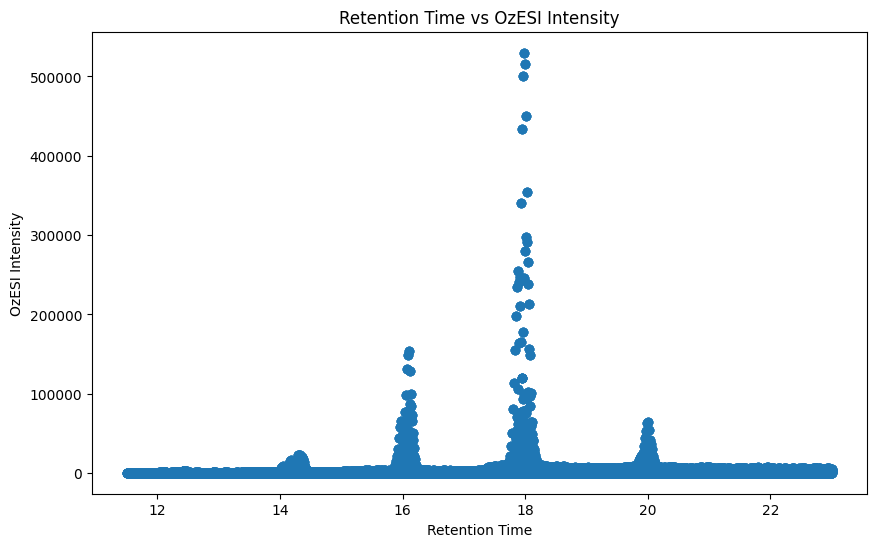

In [142]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming clustered_data is your DataFrame with the necessary data

# Plotting the Intensity vs Retention Time
plt.figure(figsize=(10, 6))
plt.scatter(clustered_data['Retention_Time'], clustered_data['OzESI_Intensity'])

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title('Retention Time vs OzESI Intensity')

# Displaying the plot
plt.show()


In [143]:
from collections import defaultdict

def add_lipid_info(matched_dataframe, db_pos, tolerance=0.3):
    """
    Adds lipid information to the data frame based on matched ions within a certain tolerance.

    :param matched_dataframe: DataFrame containing matched lipids and ion data.
    :param db_pos: List of integer values representing the positions in the OzESI list to be checked.
    :param tolerance: The acceptable difference between ion values to be considered a match.

    :return: Updated DataFrame with added lipid information.
    """
    working_dataframe = matched_dataframe.copy()  # Create a copy for processing
    final_dataframe = matched_dataframe.copy()    # Create a copy for final output

    # Convert respective column values to float for given db_pos
    for position in db_pos:
        working_dataframe['n-' + str(position)] = working_dataframe['n-' + str(position)].astype(float)

    # Iterate over the rows of the DataFrame to match lipids
    for i in range(len(working_dataframe)):
        if pd.isna(working_dataframe.loc[i, 'Lipid']):
            parent_ion = working_dataframe.loc[i, 'Parent_Ion']

            # Look for matching ions within tolerance
            for j in range(len(working_dataframe)):
                current_row = working_dataframe.loc[j].copy()

                # If the parent ion is within tolerance and the Lipid column is a string
                for n in db_pos:
                    print(f"Checking match for Parent_Ion: {parent_ion}, n-{n}: {current_row[f'n-{n}']}, Lipid: {current_row['Lipid']}")
                    
                    if within_tolerance(parent_ion, current_row[f'n-{n}'], tolerance) and isinstance(current_row['Lipid'], str):
                        working_dataframe.loc[i, 'Lipid'] = current_row['Lipid']
                        working_dataframe.loc[i, 'db_pos'] = f'n-{n}' + current_row['db_pos']

                        # Append to the final_dataframe
                        appended_row = working_dataframe.loc[i].copy()
                        appended_row['db_pos'] = f'n-{n}' + current_row['db_pos']
                        final_dataframe = final_dataframe.append(appended_row, ignore_index=True)

    # Drop rows in the final_dataframe where 'Lipid' column value is NaN
    final_dataframe.dropna(subset=['Lipid'], inplace=True)

    return final_dataframe

# def add_lipid_info(matched_dataframe, db_pos, tolerance=0.3):
#     """
#     Adds lipid information to the data frame based on matched ions within a certain tolerance.

#     :param matched_dataframe: DataFrame containing matched lipids and ion data.
#     :param db_pos: List of integer values representing the positions in the OzESI list to be checked.
#     :param tolerance: The acceptable difference between ion values to be considered a match.

#     :return: Updated DataFrame with added lipid information.
#     """
#     working_dataframe = matched_dataframe.copy()  # Create a copy for processing
#     final_dataframe = matched_dataframe.copy()    # Create a copy for final output

#     # Convert respective column values to float for given db_pos
#     for position in db_pos:
#         working_dataframe['n-' + str(position)] = working_dataframe['n-' + str(position)].astype(float)

#     # Iterate over the rows of the DataFrame to match lipids
#     for i in range(len(working_dataframe)):
#         lipid_value = working_dataframe.loc[i, 'Lipid']
#         if pd.isna(lipid_value) or lipid_value == '':  # Check for NaN or empty string
#             parent_ion = working_dataframe.loc[i, 'Parent_Ion']

#             # Look for matching ions within tolerance
#             for j in range(len(working_dataframe)):
#                 current_row = working_dataframe.loc[j]

#                 # If the parent ion is within tolerance and the Lipid column is a string
#                 for n in db_pos:
#                     if within_tolerance(parent_ion, current_row[f'n-{n}'], tolerance) and isinstance(current_row['Lipid'], str):
#                         working_dataframe.loc[i, 'Lipid'] = current_row['Lipid']
#                         working_dataframe.loc[i, 'db_pos'] = f'n-{n}' + current_row['db_pos']

#                         # Append to the final_dataframe
#                         appended_row = working_dataframe.loc[i].copy()
#                         appended_row['db_pos'] = f'n-{n}' + current_row['db_pos']
#                         final_dataframe = final_dataframe.append(appended_row, ignore_index=True)

#     # Drop rows in the final_dataframe where 'Lipid' column value is NaN or empty
#     final_dataframe.dropna(subset=['Lipid'], inplace=True)
#     final_dataframe = final_dataframe[final_dataframe['Lipid'] != '']

#     return final_dataframe


def within_tolerance(a, b, tolerance=0.3):
    """
    Checks if the absolute difference between two values is within a given tolerance.
    
    :param a: First value to compare.
    :param b: Second value to compare.
    :param tolerance: The acceptable difference between the two values. Defaults to 0.3.
    
    :return: Boolean indicating whether the difference is within the given tolerance.
    """
    return abs(a - b) <= tolerance


def match_lipids_parser(mrm_database, df, tolerance=0.3):
    """
    Performs lipid matching by creating an ion dictionary from the MRM database and applying the match_ions function to each row of a DataFrame.
    
    :param mrm_database: DataFrame containing MRM database information.
    :param df: DataFrame containing ion information to be matched.
    :param tolerance: The acceptable difference between ion values to be considered a match. Defaults to 0.3.
    
    :return: DataFrame with matched lipid and class information if matches were found.
    """
    ion_dict = create_ion_dict(mrm_database)
    df_matched = df.apply(lambda row: match_ions(row, ion_dict=ion_dict, tolerance=tolerance), axis=1)
    return df_matched

def create_ion_dict(mrm_database):
    """
    Creates a dictionary of ions from an MRM database DataFrame.
    
    :param mrm_database: DataFrame containing MRM database information.
    
    :return: A dictionary with ion pairs as keys, and a list of tuples containing corresponding lipid and class as values.
    """
    ion_dict = defaultdict(list)
    for index, row in mrm_database.iterrows():
        ion_dict[(row['Parent_Ion'], row['Product_Ion'])].append((row['Lipid'], row['Class']))
    return ion_dict


def match_ions(row, ion_dict, tolerance=0.3):
    """
    Matches the ions in a DataFrame row with the ions in an ion dictionary.
    
    :param row: A DataFrame row containing 'Parent_Ion' and 'Product_Ion' columns.
    :param ion_dict: A dictionary of ion pairs and their corresponding lipid and class information.
    :param tolerance: The acceptable difference between ion values to be considered a match. Defaults to 0.3.
    
    :return: The original row updated with matched lipid and class information if matches were found.
    """
    ions = (row['Parent_Ion'], row['Product_Ion'])
    matched_lipids = []
    matched_classes = []

    for key, value in ion_dict.items():
        if within_tolerance(ions[0], key[0], tolerance) and within_tolerance(ions[1], key[1], tolerance):
            matched_lipids.extend([match[0] for match in value])
            matched_classes.extend([match[1] for match in value])

    if matched_lipids and matched_classes:
        row['Lipid'] = ' | '.join(matched_lipids)
        row['Class'] = ' | '.join(matched_classes)

    return row



def match_lipids_with_rt(df, df_MRM_RT_correct, ion_tolerance=0.3, rt_tolerance=0.5):
    """
    Performs lipid matching based on both ion values and retention time.

    :param df: DataFrame containing ion information to be matched.
    :param df_MRM_RT_correct: DataFrame containing the MRM database information with retention time.
    :param ion_tolerance: The acceptable difference between ion values to be considered a match. Defaults to 0.3.
    :param rt_tolerance: The acceptable difference between retention times to be considered a match. Defaults to 0.5.

    :return: DataFrame with matched lipid, class, and retention time information if matches were found.
    """

 

    # Merging the MRM database with the input DataFrame on ion values within the specified ion tolerance
    merged_df = pd.merge(df, df_MRM_RT_correct, on=['Parent_Ion', 'Product_Ion'], how='inner')

    # Filter the merged DataFrame based on the ion and retention time tolerance
    matched_df = merged_df[
        (abs(merged_df['Retention_Time'] - merged_df['Retention_Time']) <= rt_tolerance) &
        (abs(merged_df['Parent_Ion'] - merged_df['Parent_Ion']) <= ion_tolerance) &
        (abs(merged_df['Product_Ion'] - merged_df['Product_Ion']) <= ion_tolerance)
    ]

    # Selecting relevant columns and renaming them if necessary
    matched_df = matched_df[['Lipid', 'Parent_Ion', 'Product_Ion', 'Retention_Time']]
    matched_df.rename(columns={'Retention_Time_x': 'Retention_Time'}, inplace=True)

    return matched_df


def calculate_DB_Position(df_matched_ions, db_pos_list=[7,9,12]):
    """
    Creates a new DataFrame to store the DB_Position and Aldehyde_Ion values,
    and calculate n-i values for the given db_pos_list.
    
    Parameters:
        df_matched_ions (pd.DataFrame): Input DataFrame containing matched ions.
        db_pos_list (list): List of OzESI positions to calculate n-i values.
        
    Returns:
        pd.DataFrame: Modified DataFrame with new calculated columns for n-i values.
    """
    # Create a DataFrame to store the DB_Position and corresponding Aldehyde_Ion values
    df_DB_aldehyde = pd.DataFrame(columns=['DB_Position','Aldehyde_Ion'])

    # Loop through the range of DB_Position values to calculate the corresponding Aldehyde_Ion values
    for position in range(3, 21):
        df_DB_aldehyde.loc[position, 'DB_Position'] = position
        df_DB_aldehyde.loc[position, 'Aldehyde_Ion'] = 26 + (14 * (position-3))

    # Loop through the specified db_pos_list
    for ozesi_position in db_pos_list:
        # Retrieve the corresponding Aldehyde_Ion value for the current DB_Position
        aldehyde_ion = df_DB_aldehyde.loc[df_DB_aldehyde["DB_Position"] == ozesi_position, "Aldehyde_Ion"].values[0]

        # Calculate and store the n-i value for the current OzESI position
        df_matched_ions["n-{}".format(ozesi_position)] = df_matched_ions["Parent_Ion"] - aldehyde_ion

    return df_matched_ions



make db pos df from MRM Matched df

In [144]:
#MRM CORRECT RT DF
df_MRM_RT_correct = pd.read_csv('CLAW_Canola_CorrectRT_v3_manual.csv') #correct MRM RT
print(df_MRM_RT_correct)
# df_MRM_RT_correct['Retention_Time'] = df_MRM_RT_correct['Average_Retention_Time']

# List of new column names based on db_pos_list
db_column_names = []
db_pos_list = [7, 9, 10, 12]


df_DB_aldehyde = pd.DataFrame(columns=['DB_Position','Aldehyde_Ion'])

# Loop through the range of DB_Position values to calculate the corresponding Aldehyde_Ion values
for position in range(3, 21):
    df_DB_aldehyde.loc[position, 'DB_Position'] = position
    df_DB_aldehyde.loc[position, 'Aldehyde_Ion'] = 26 + (14 * (position-3))

for number in db_pos_list:
    db_column_names.append(f'n-{number}')

# Create an empty DataFrame with initial columns
df_db_pos = pd.DataFrame(columns=['Lipid', 'Retention_Time', 'Parent_Ion','Product_Ion'])

# Append new column names to the DataFrame
for column_name in db_column_names:
    df_db_pos[column_name] = pd.NA  # Initialize the new columns with NA

# df_DB_aldehyde #aldehyde ion values


#append df_MRM_RT_correct to df_db_pos
df_db_pos = df_db_pos.append(df_MRM_RT_correct, ignore_index=True)


# Loop through the specified db_pos_list
for ozesi_position in db_pos_list:
    # Retrieve the corresponding Aldehyde_Ion value for the current DB_Position
    aldehyde_ion = df_DB_aldehyde.loc[df_DB_aldehyde["DB_Position"] == ozesi_position, "Aldehyde_Ion"].values[0]

    # Calculate and store the n-i value for the current OzESI position
    df_db_pos["n-{}".format(ozesi_position)] = df_db_pos["Parent_Ion"] - aldehyde_ion

# df_MRM_RT_correct  #correct MRM RT
df_db_pos  #empty df with n-7, n-9, n-10, n-12 columns






                          Lipid  Retention_Time  Parent_Ion  Product_Ion
0             [TG(52:4)]_FA18:1           14.32       872.8        573.6
1             [TG(52:5)]_FA18:1           12.59       870.8        571.6
2   [TG(53:10),TG(52:3)]_FA18:1           16.12       874.8        575.6
3    [TG(53:9),TG(52:2)]_FA18:1           18.04       876.8        577.6
4             [TG(54:5)]_FA18:1           14.30       898.8        599.6
5             [TG(54:6)]_FA18:1           12.43       896.8        597.6
6    [TG(54:7),TG(53:0)]_FA18:1           10.73       894.8        595.6
7   [TG(55:10),TG(54:3)]_FA18:1           17.99       902.8        603.6
8   [TG(55:11),TG(54:4)]_FA18:1           16.08       900.8        601.6
9    [TG(55:9),TG(54:2)]_FA18:1           20.00       904.8        605.6
10                          NaN           22.16       760.6        571.6


,Lipid,Retention_Time,Parent_Ion,Product_Ion,n-7,n-9,n-10,n-12
0,[TG(52:4)]_FA18:1,14.32,872.8,573.6,790.8,762.8,748.8,720.8
1,[TG(52:5)]_FA18:1,12.59,870.8,571.6,788.8,760.8,746.8,718.8
2,"[TG(53:10),TG(52:3)]_FA18:1",16.12,874.8,575.6,792.8,764.8,750.8,722.8
3,"[TG(53:9),TG(52:2)]_FA18:1",18.04,876.8,577.6,794.8,766.8,752.8,724.8
4,[TG(54:5)]_FA18:1,14.30,898.8,599.6,816.8,788.8,774.8,746.8
5,[TG(54:6)]_FA18:1,12.43,896.8,597.6,814.8,786.8,772.8,744.8
6,"[TG(54:7),TG(53:0)]_FA18:1",10.73,894.8,595.6,812.8,784.8,770.8,742.8
7,"[TG(55:10),TG(54:3)]_FA18:1",17.99,902.8,603.6,820.8,792.8,778.8,750.8
8,"[TG(55:11),TG(54:4)]_FA18:1",16.08,900.8,601.6,818.8,790.8,776.8,748.8
9,"[TG(55:9),TG(54:2)]_FA18:1",20.00,904.8,605.6,822.8,794.8,780.8,752.8


In [145]:
grouped_cluster_data = clustered_data.groupby(['Parent_Ion', 'Product_Ion'])
#add group number to each to a new column called Group
clustered_data['Group'] = grouped_cluster_data.ngroup()
clustered_data

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group
759,760.6,571.6,12.393633,572.120056,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1,0
760,760.6,571.6,12.409950,578.520020,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1,0
761,760.6,571.6,12.426250,569.660034,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1,0
75877,760.6,571.6,12.377367,541.140015,DegummedCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1,0
151587,760.6,571.6,22.015333,525.880066,RBDCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1,0
...,...,...,...,...,...,...,...,...
900687,904.8,605.6,22.929050,2723.560303,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0,30
900688,904.8,605.6,22.945350,2735.100098,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0,30
900689,904.8,605.6,22.961667,2529.520264,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0,30
900690,904.8,605.6,22.977967,2178.660156,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0,30


OzESI double bonds adding

For Loops FOR LOOOOPS

In [146]:
# Filter retention time from df_OzESI_matched 
Oz1 = clustered_data.copy()
# Insert a column named 'Lipid' at the first index
Oz1.insert(0, 'Lipid', '')
Oz1.insert(8,'db_pos', '')
# Oz1

import pandas as pd

# # Function to check if a value is within a specified tolerance
def within_tolerance(val1, val2, tolerance):
    return abs(val1 - val2) <= tolerance

# Define the list of positions
db_pos_list = [7, 9, 10, 12]
columns = [
    "Lipid"
    "Parent_Ion",
    "Product_Ion",
    "Retention_Time",
    "OzESI_Intensity",
    "Sample_ID",
    "Transition",
    "Cluster_Label",
]

# Create a new DataFrame with the specified columns
Oz1b= pd.DataFrame(columns=columns)

### 3rd try
# Iterate through Oz1 DataFrame
for index, oz_row in Oz1.iterrows():
    # Initialize variables to accumulate matches
    matched_lipids = []
    db_pos_matches = []

    # For each n-# column in db_pos_list
    for n in db_pos_list:
        n_column = f'n-{n}'

        # Find matches in db_pos_df
        matches = df_db_pos[
            within_tolerance(df_db_pos['Product_Ion'], oz_row['Product_Ion'], 0.3) &
            within_tolerance(df_db_pos[n_column], oz_row['Parent_Ion'], 0.3) &
            within_tolerance(df_db_pos['Retention_Time'], oz_row['Retention_Time'], 0.2)
        ]

        # Accumulate all matched lipids and db_pos values
        for _, match_row in matches.iterrows():
            matched_lipids.append(match_row['Lipid'])
            db_pos_matches.append(n_column)

    new_row = oz_row.copy()
    if matched_lipids:
        new_row['Lipid'] = ', '.join(matched_lipids)
    if db_pos_matches:
        new_row['db_pos'] = ', '.join(db_pos_matches)
    Oz1b = Oz1b.append(new_row, ignore_index=True)

# Oz1 now contains the updated Lipid and db_pos information for all matches



Oz1b




KeyboardInterrupt: 

In [ ]:
Oz1b

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,db_pos,Group
708,,760.6,571.6,11.561933,306.220032,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1,,0
730,,760.6,571.6,11.920700,322.140015,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,15,,0
731,,760.6,571.6,11.937017,330.280029,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,15,,0
757,,760.6,571.6,12.361017,301.140015,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,0,"n-7, n-9, n-10, n-12",0
758,,760.6,571.6,12.377333,325.080017,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,0,"n-7, n-9, n-10, n-12",0
...,...,...,...,...,...,...,...,...,...,...
450095,,904.8,605.6,24.918617,2559.320068,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0,,33
450096,,904.8,605.6,24.934933,2266.680176,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0,,33
450097,,904.8,605.6,24.951233,2466.900146,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0,,33
450098,,904.8,605.6,24.967550,2262.680176,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0,,33


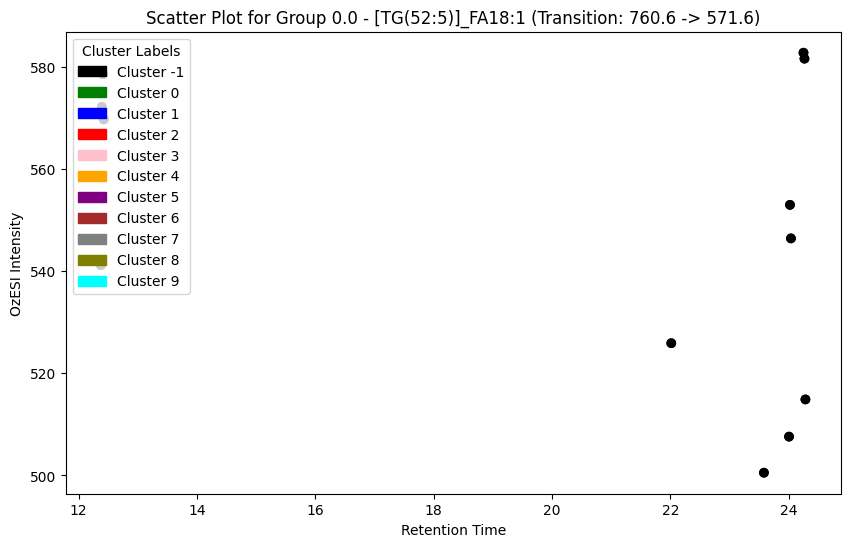

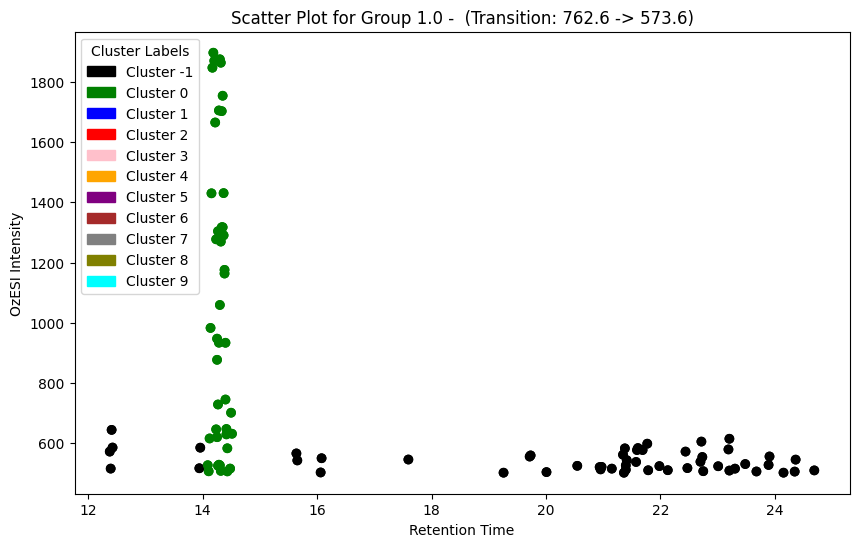

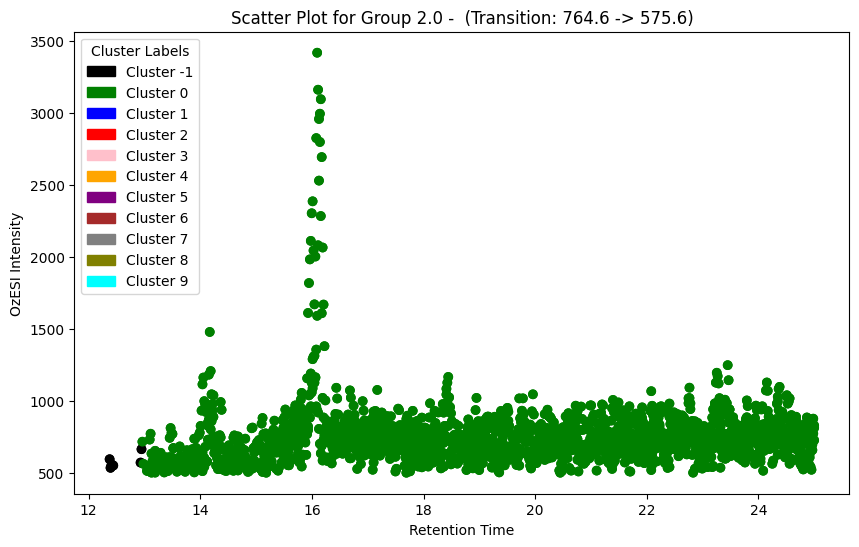

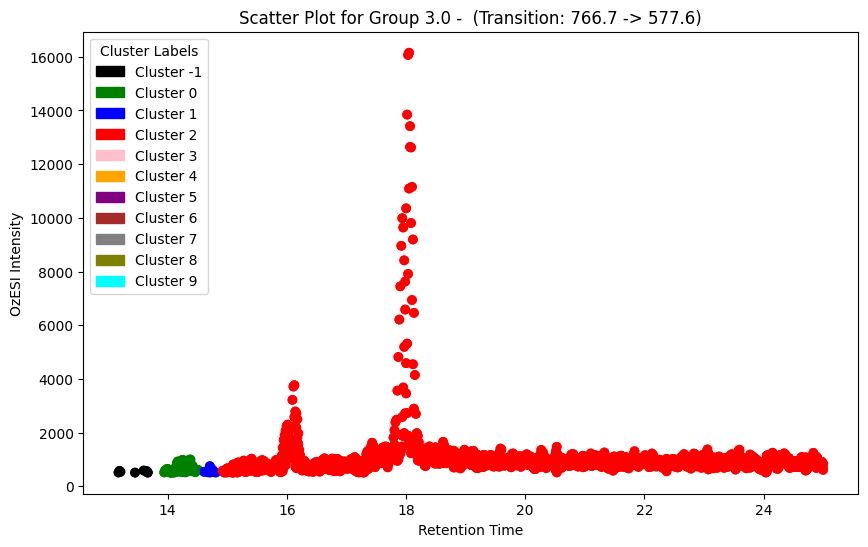

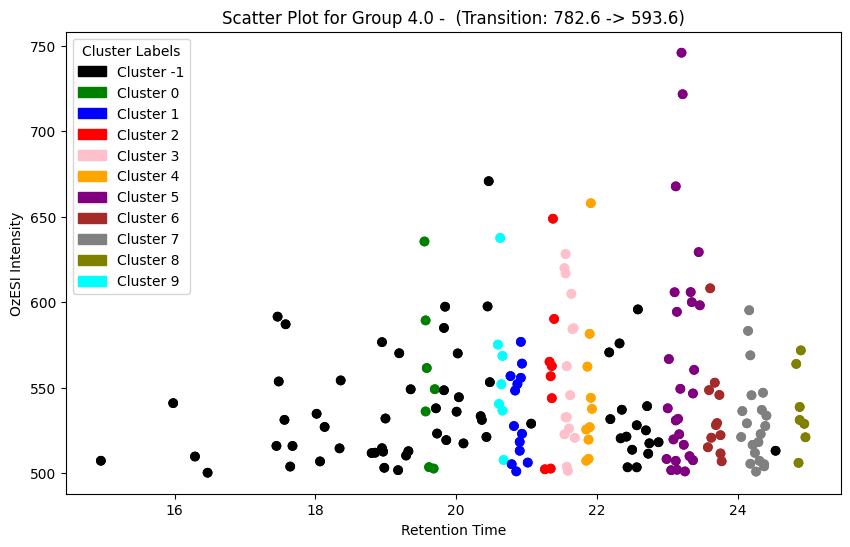

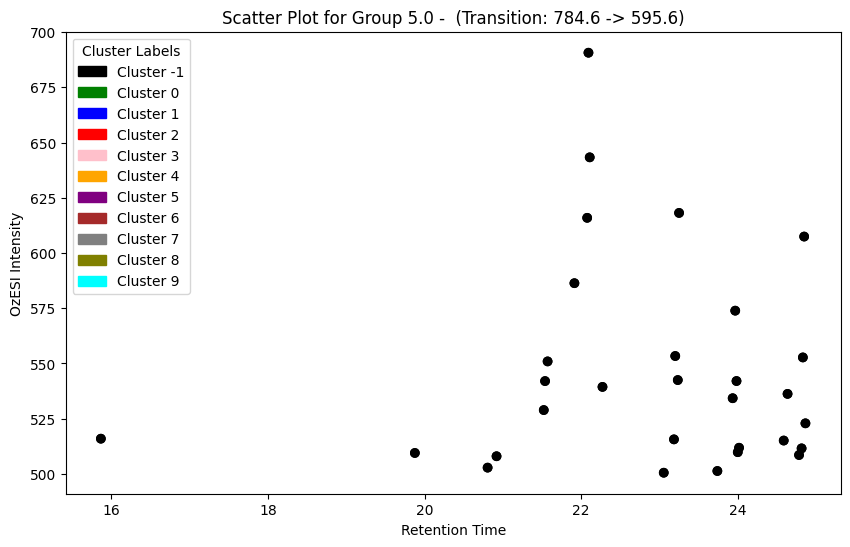

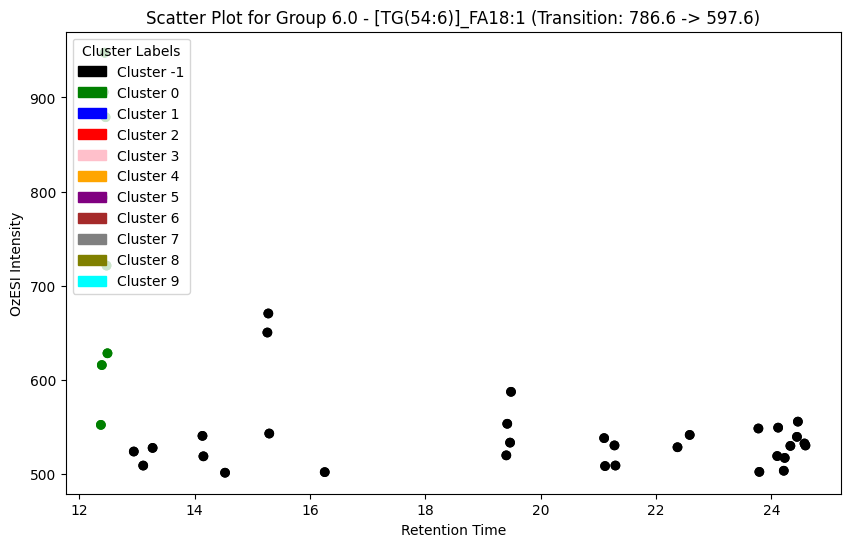

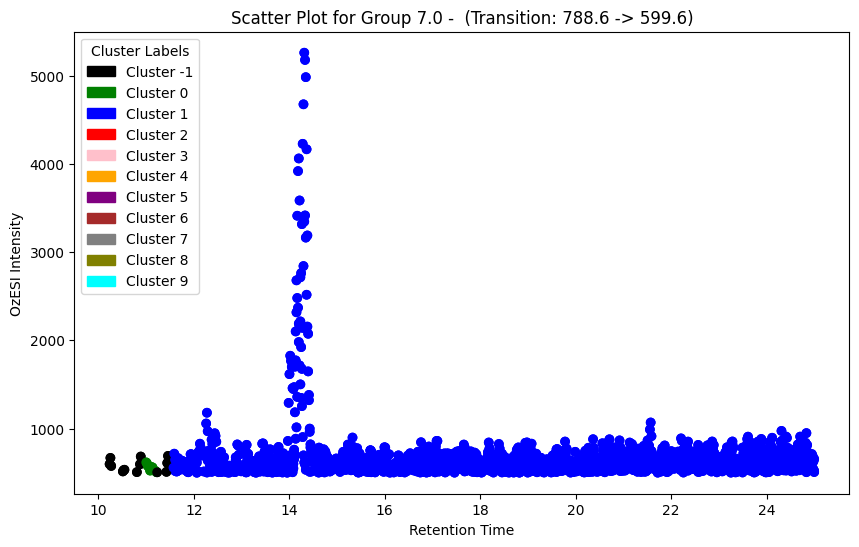

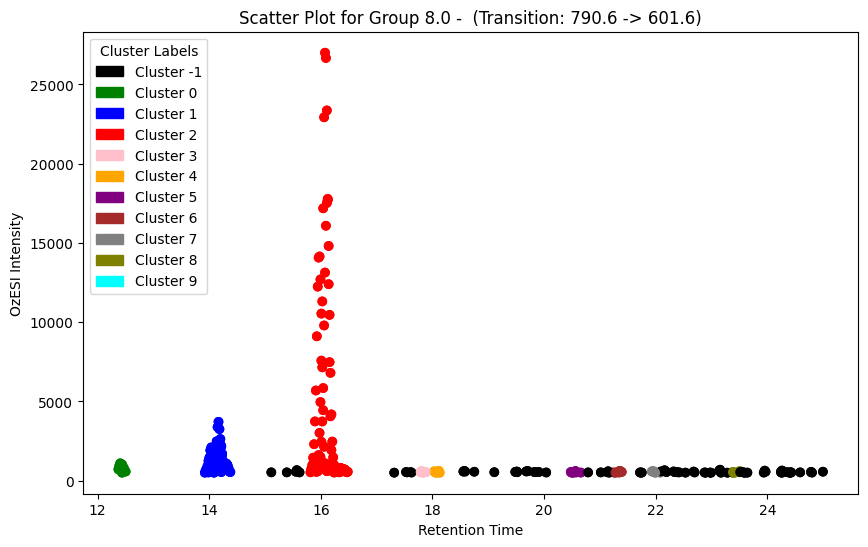

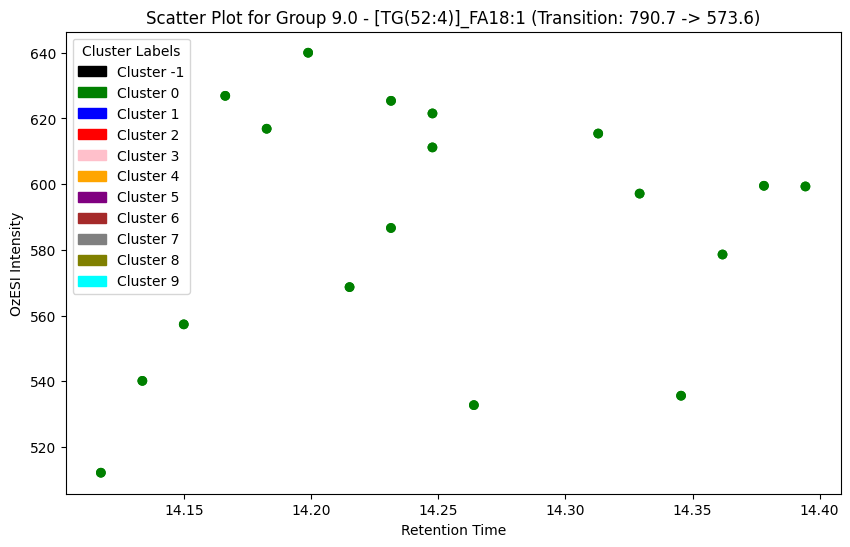

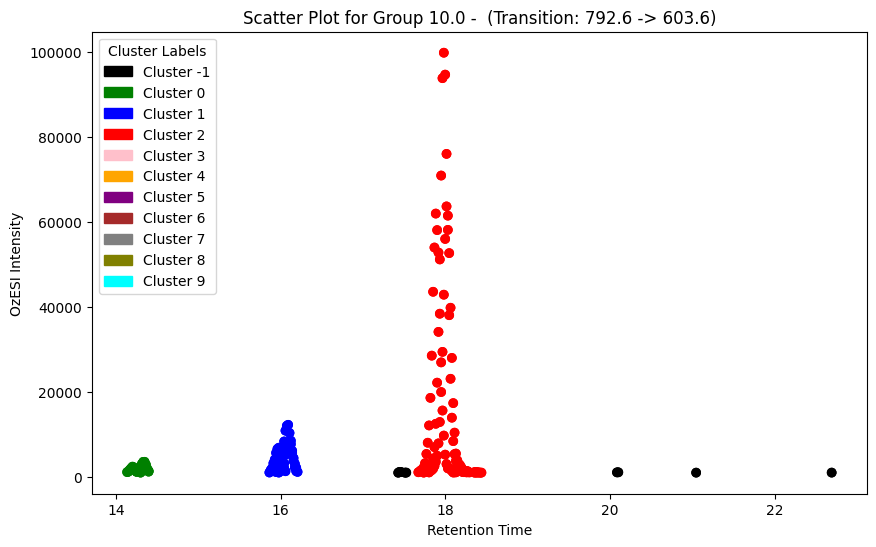

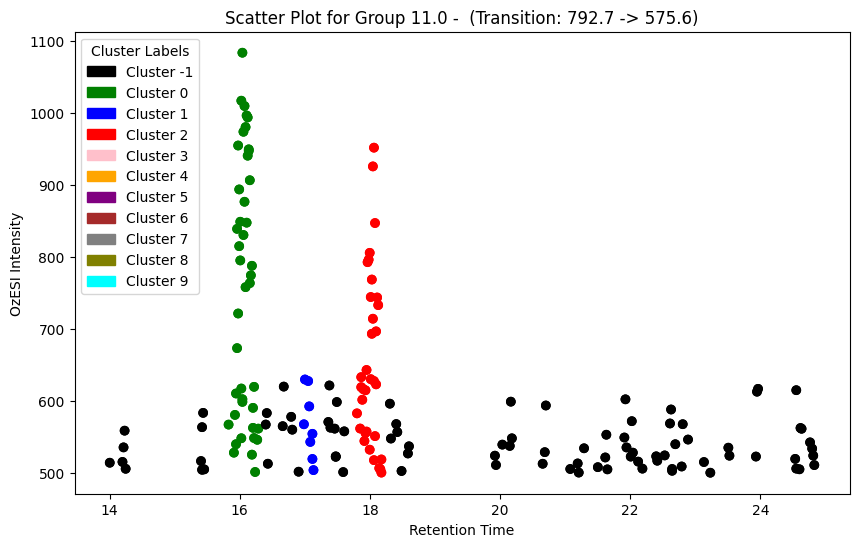

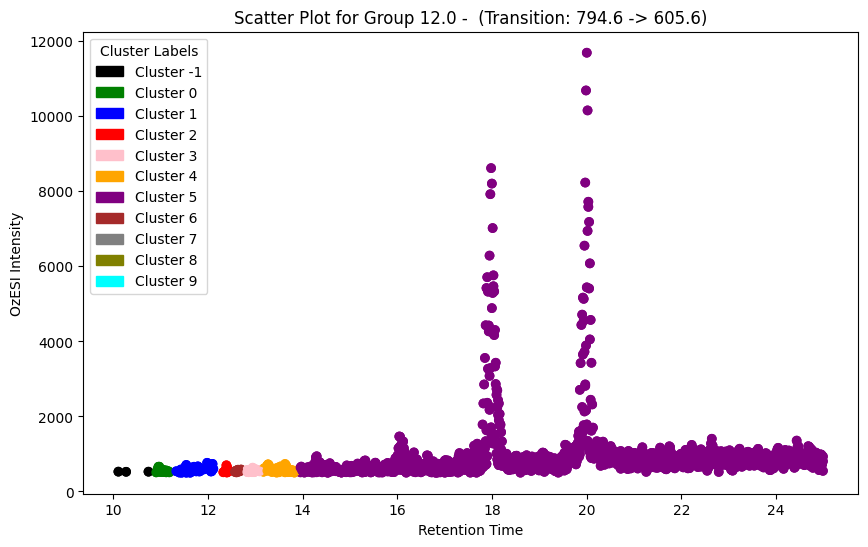

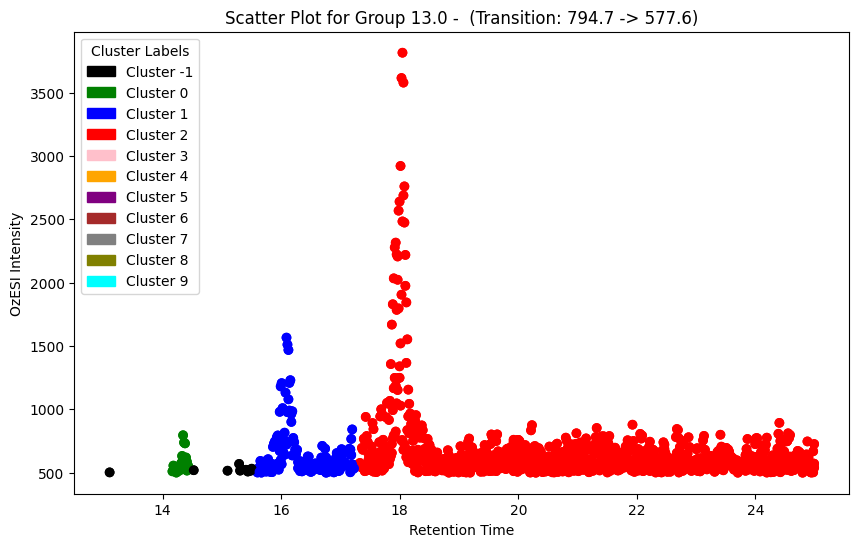

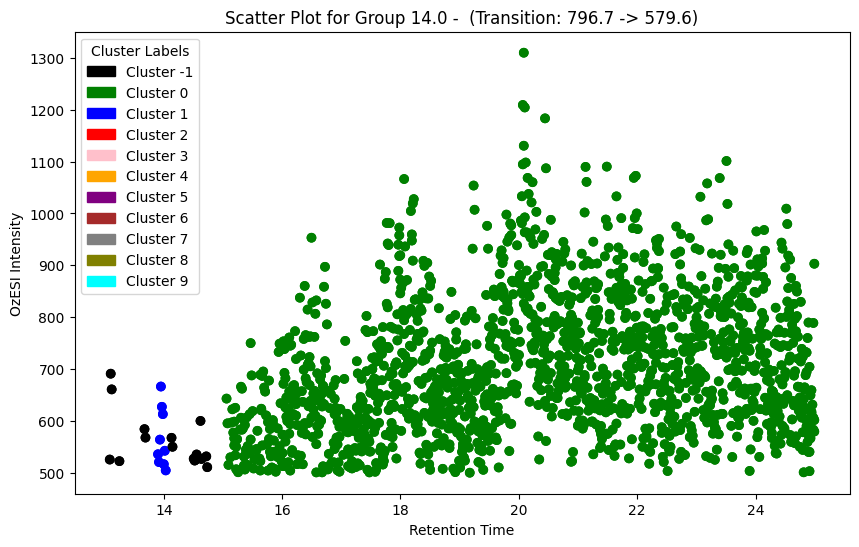

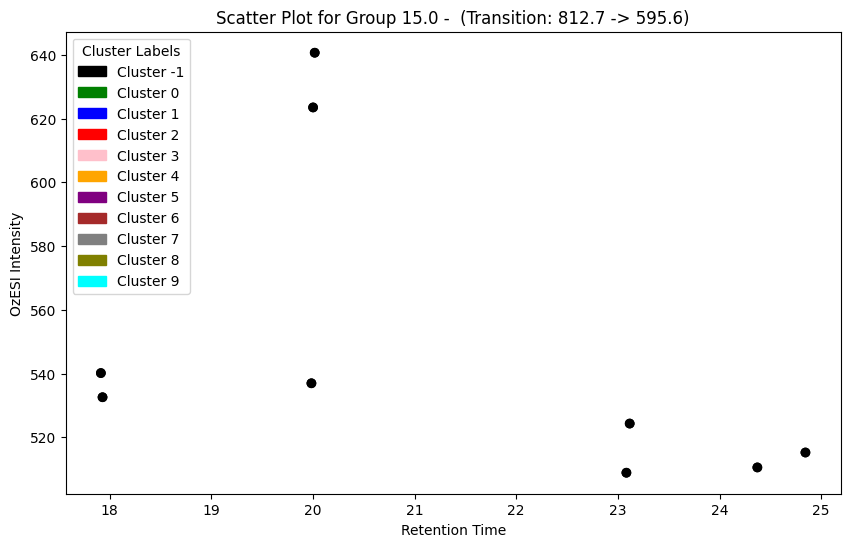

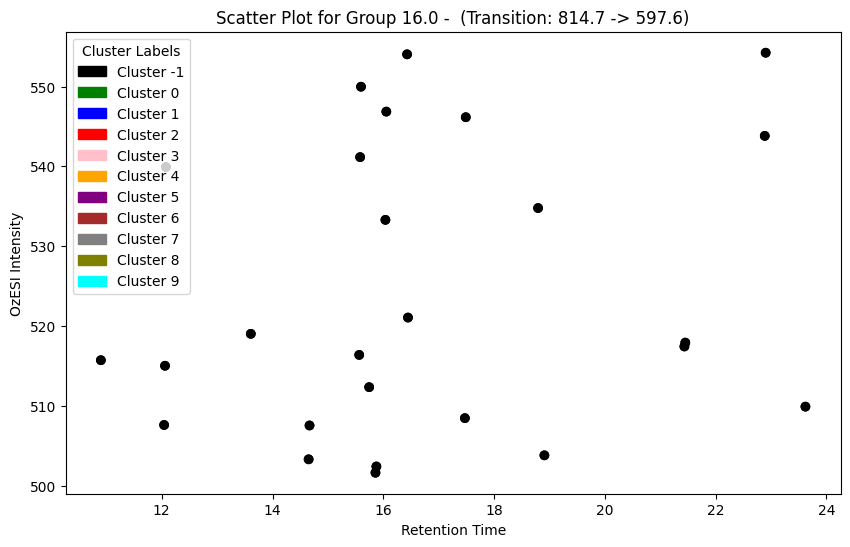

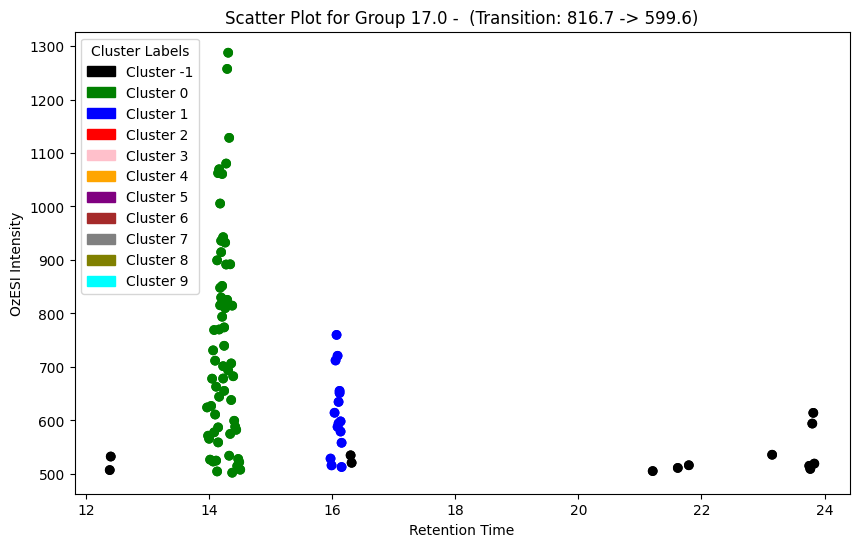

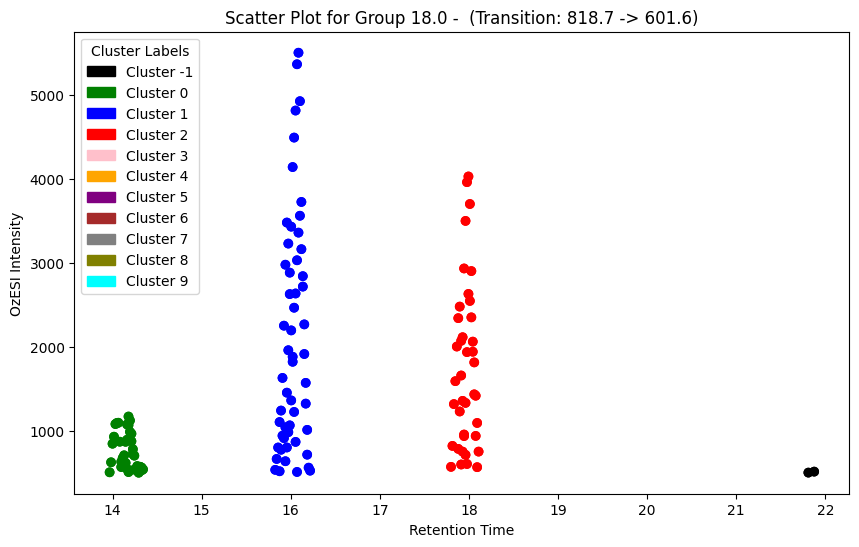

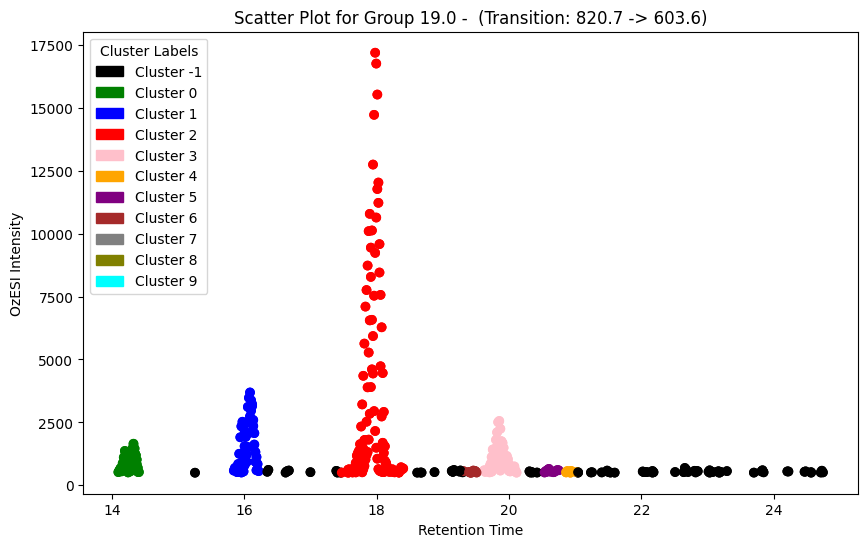

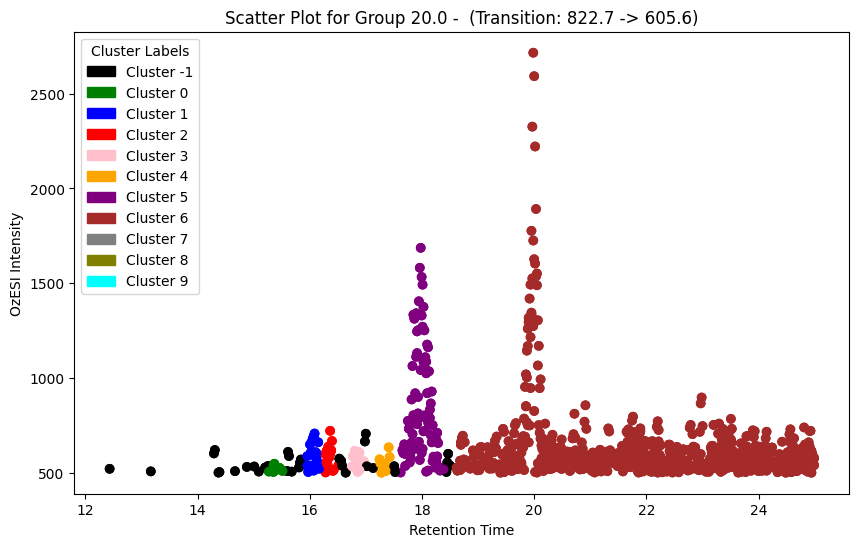

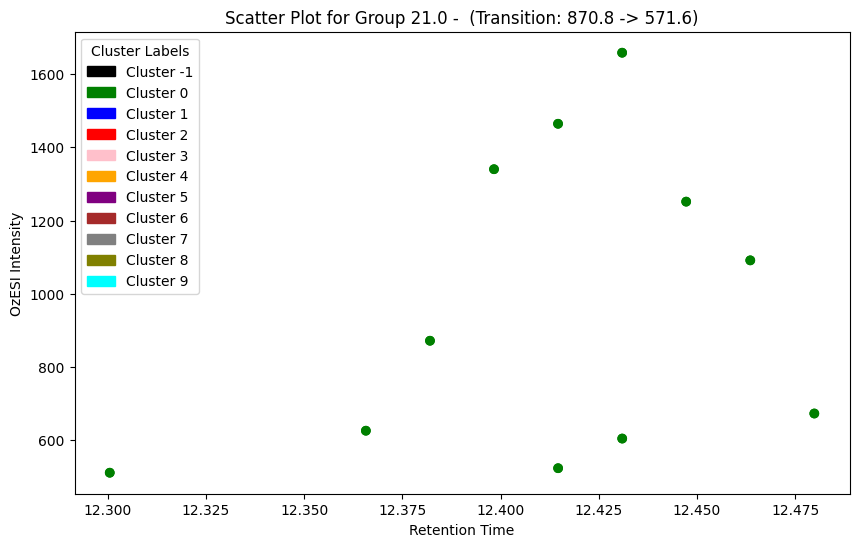

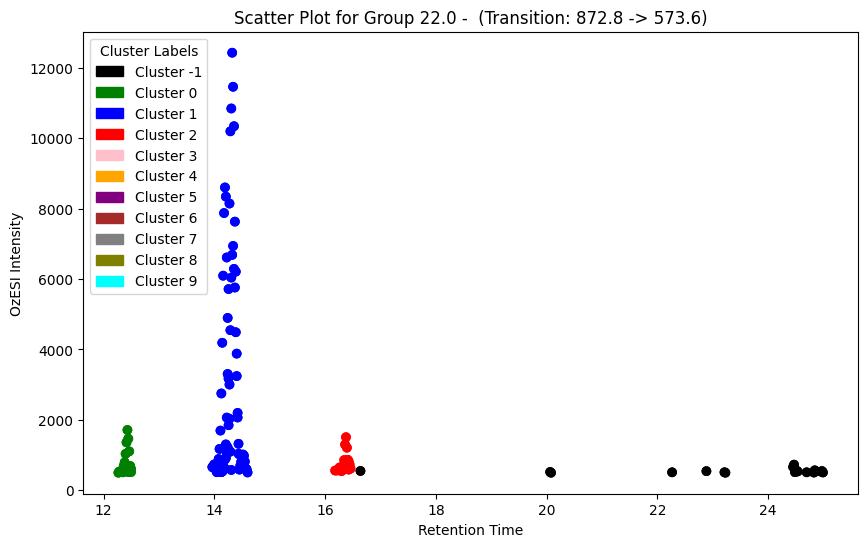

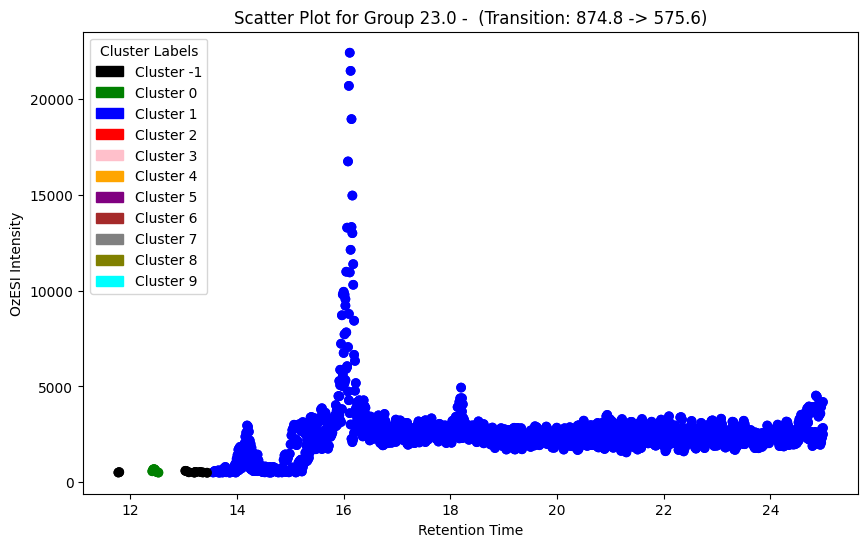

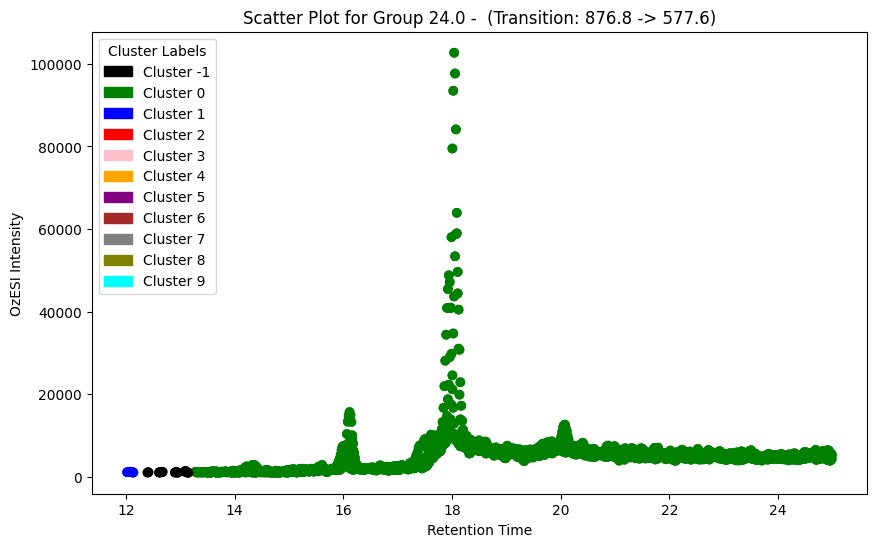

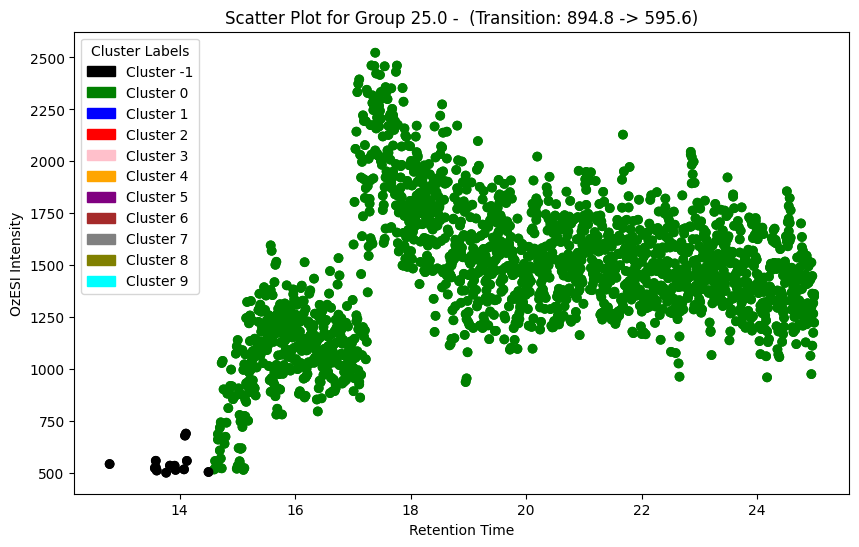

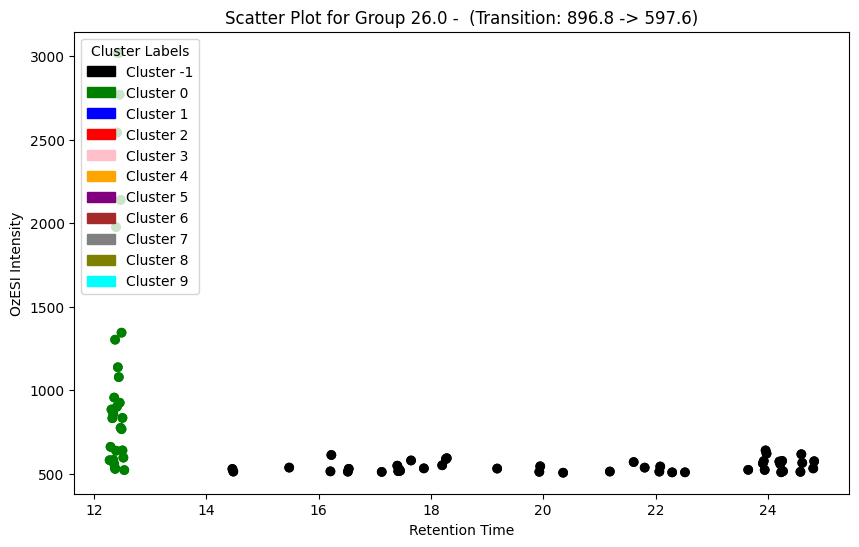

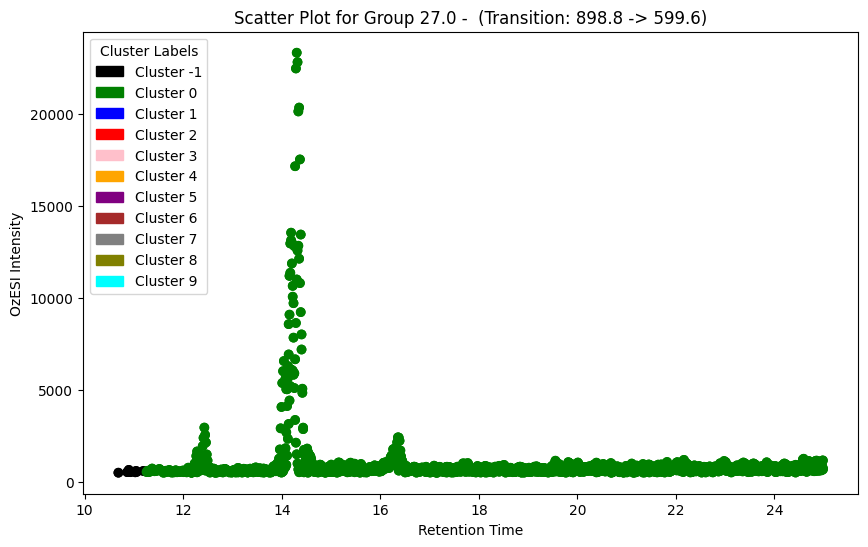

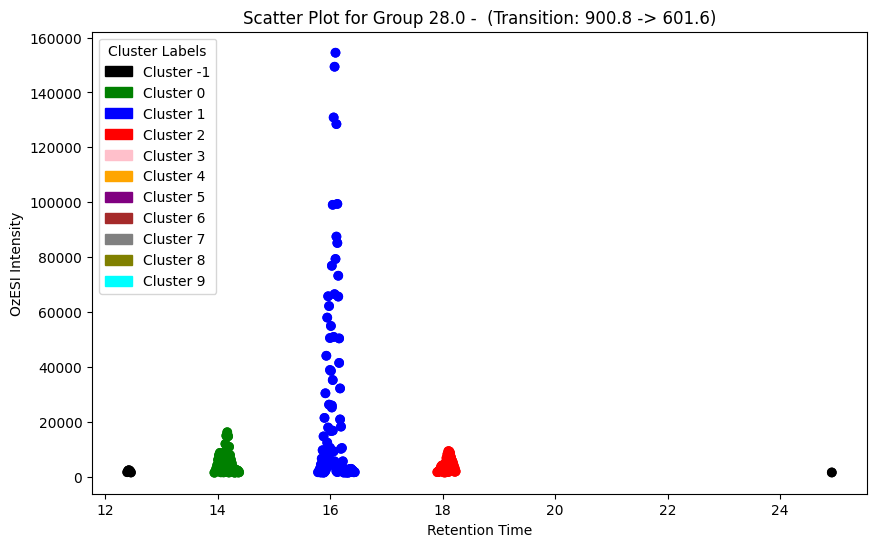

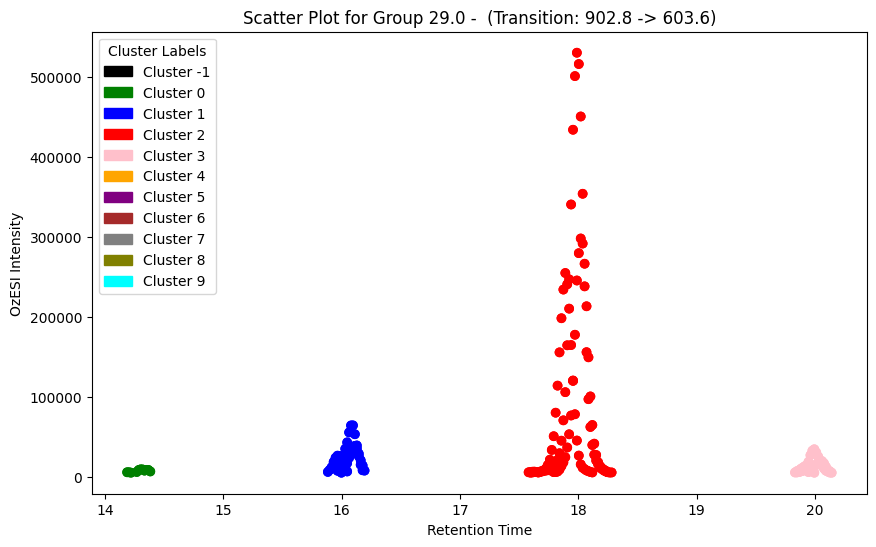

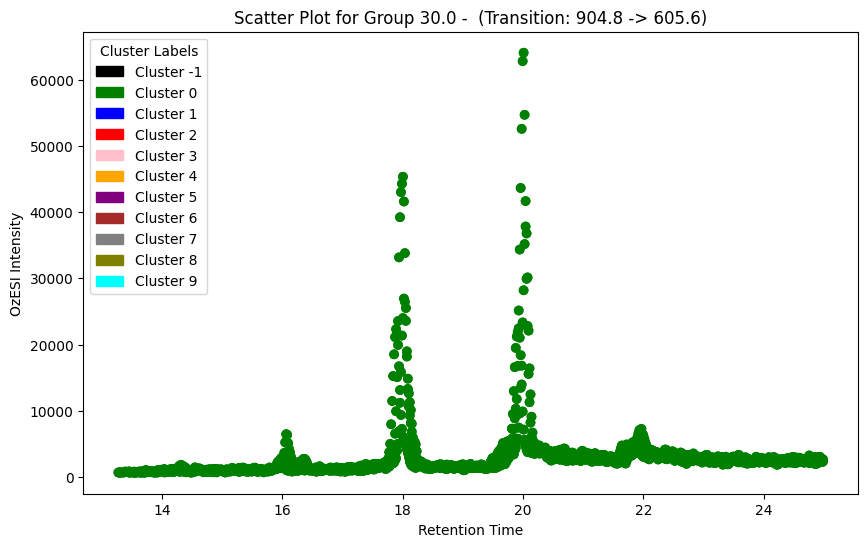

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

# save_dir = 'Projects/canola/plots/validation_oz/'

# Define custom colors for the clusters add up to 10 clusters
color_map = {-1: 'black', 0: 'green', 1: 'blue', 2: 'red', 3: 'pink', 4: 'orange', 5: 'purple', 6: 'brown', 7: 'gray', 8: 'olive', 9: 'cyan'}

# Get unique Group values from Oz1b
unique_groups = Oz1b['Group'].unique()

# Iterate through each unique group
for group in unique_groups:
    # Filter the data for each Group in Oz1b
    group_filtered_data = Oz1b[Oz1b['Group'] == group]
    colors = group_filtered_data['Cluster_Label'].map(color_map)

    # Extract the corresponding Transition and Lipid Name for the group
    # Assuming that all rows in a group have the same Transition and Lipid Name
    transition_value = group_filtered_data['Transition'].iloc[0]
    lipid_name = group_filtered_data['Lipid'].iloc[0]

    # Set up the plot for each group
    plt.figure(figsize=(10, 6))
    plt.scatter(group_filtered_data['Retention_Time'], group_filtered_data['OzESI_Intensity'], color=colors)

    # Add labels and title
    plt.xlabel('Retention Time')
    plt.ylabel('OzESI Intensity')
    plt.title(f'Scatter Plot for Group {group} - {lipid_name} (Transition: {transition_value})')

    # Create a legend for the plot
    patch_list = [mpatches.Patch(color=color, label=f'Cluster {label}') for label, color in color_map.items()]
    plt.legend(handles=patch_list, loc='upper left', title='Cluster Labels')
    
    # Save the plot as a PNG file in the specified directory
    filename = f'Group_{group}_{lipid_name}_Transition_{transition_value}.png'
    plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')

    # Show the plot
    plt.show()


In [ ]:
# # filter df for Parent ion 736.7 Product IOn 547.5 and Sample_ID 11292023_DOD93_F4_5xFAD_cortex
# ggg = Oz1b[(Oz1b['Parent_Ion'] == 736.7) & 
#                      (Oz1b['Product_Ion'] == 547.5) & 
#                      (Oz1b['Sample_ID'] == '11292023_DOD93_F4_5xFAD_cortex_O3on_01')]
# ggg

In [ ]:
# Oz1cZ = Oz1b.copy()
# # Assuming your DataFrame is named Oz1c
# Oz1cZ = Oz1cZ[Oz1cZ['db_pos'] != '']
# Oz1cZ



,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,db_pos,Group
757,[TG(52:5)]_FA18:1,760.6,571.6,12.361017,301.140015,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,0,n-7,0
758,[TG(52:5)]_FA18:1,760.6,571.6,12.377333,325.080017,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,0,n-7,0
759,[TG(52:5)]_FA18:1,760.6,571.6,12.393633,572.120056,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,0,n-7,0
760,[TG(52:5)]_FA18:1,760.6,571.6,12.409950,578.520020,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,0,n-7,0
761,[TG(52:5)]_FA18:1,760.6,571.6,12.426250,569.660034,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,0,n-7,0
...,...,...,...,...,...,...,...,...,...,...
449807,"[TG(55:9),TG(54:2)]_FA18:1",904.8,605.6,20.221933,4114.880371,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0,n-7,33
449808,"[TG(55:9),TG(54:2)]_FA18:1",904.8,605.6,20.238233,3806.460205,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0,n-7,33
449809,"[TG(55:9),TG(54:2)]_FA18:1",904.8,605.6,20.254533,3709.520264,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0,n-7,33
449810,"[TG(55:9),TG(54:2)]_FA18:1",904.8,605.6,20.270850,3982.060303,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6,0,n-7,33


In [ ]:
Oz1c = Oz1b.copy()
# Assuming your DataFrame is named Oz1c
Oz1c = Oz1c[Oz1c['db_pos'] != '']
Oz1c



,LipidParent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Lipid,Parent_Ion,db_pos
0,NaN,571.6,12.393633,572.120056,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1,0.0,[TG(52:5)]_FA18:1,760.6,n-9
1,NaN,571.6,12.409950,578.520020,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1,0.0,[TG(52:5)]_FA18:1,760.6,n-9
2,NaN,571.6,12.426250,569.660034,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1,0.0,[TG(52:5)]_FA18:1,760.6,n-9
12,NaN,571.6,12.393633,572.120056,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1,0.0,[TG(52:5)]_FA18:1,760.6,n-9
13,NaN,571.6,12.409950,578.520020,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,-1,0.0,[TG(52:5)]_FA18:1,760.6,n-9
...,...,...,...,...,...,...,...,...,...,...,...
26052,NaN,605.6,20.097050,946.420044,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,6,20.0,"[TG(55:9),TG(54:2)]_FA18:1",822.7,n-7
26053,NaN,605.6,20.113367,992.700073,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,6,20.0,"[TG(55:9),TG(54:2)]_FA18:1",822.7,n-7
26054,NaN,605.6,20.129667,678.120056,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,6,20.0,"[TG(55:9),TG(54:2)]_FA18:1",822.7,n-7
26055,NaN,605.6,20.145983,682.040039,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,6,20.0,"[TG(55:9),TG(54:2)]_FA18:1",822.7,n-7


In [ ]:
# # filter df for Parent ion 736.7 Product IOn 547.5 and Sample_ID 11292023_DOD93_F4_5xFAD_cortex
# ccc = Oz1c[(Oz1c['Parent_Ion'] == 736.7) & 
#                      (Oz1c['Product_Ion'] == 547.5) & 
#                      (Oz1c['Sample_ID'] == '11292023_DOD93_F4_5xFAD_cortex_O3on_01')]
# ccc

In [ ]:
# print(Oz1b['db_pos'].unique())
# Oz2 = Oz1b.copy()
# #drop columns where lipid is ''
# Oz2 = Oz2[Oz2['Lipid'] != '']
# print(len(Oz2['Lipid'].unique()))
# #print unqiue Lipid values and their corresponding db_pos values and Retention_Time
# for lipid in Oz2['Lipid'].unique():
#     print(lipid)
# Oz2

In [173]:
#based on sample_ID Lipid and db pos, keep the unique value with the highest intensity
# Sort the DataFrame by 'OzESI_Intensity' in descending order to ensure the highest intensity is first


Oz2 = Oz1c.copy()
print(len(Oz2))
# Group by 'Lipid' and 'db_pos', then find the index of the row with the highest 'OzESI_Intensity' in each group
indices_of_max_intensity = Oz2.groupby(['Lipid','Sample_ID', 'db_pos'])['OzESI_Intensity'].idxmax()

# Use these indices to filter your DataFrame
Oz2_filtered = Oz2.loc[indices_of_max_intensity]
print(len(Oz2_filtered))
# Oz2_sorted = Oz2_filtered.sort_values(by='OzESI_Intensity', ascending=False)
#sort Oz2 by Sample_ID, then Lipid then db_pos
Oz2_validate = Oz2_filtered.groupby(['Lipid', 'Sample_ID', 'db_pos']).first().reset_index()



#round the retention time to 2 decimal places
Oz2_validate['Retention_Time'] = Oz2_validate['Retention_Time'].round(2)
#round intensity to 0 decimal places
Oz2_validate['OzESI_Intensity'] = Oz2_validate['OzESI_Intensity'].round(0)

# Define a function to determine the purity based on the Sample_ID
def determine_purity(sample_id):
    if "Crude" in sample_id:
        return "Crude"
    elif "Degummed" in sample_id:
        return "Degummed"
    elif "RBD" in sample_id:
        return "RBD"
    else:
        return "Unknown"
# Apply the determine_purity function to create the 'Purity' column in Oz2_validate DataFrame
Oz2_validate['Purity'] = Oz2_validate['Sample_ID'].apply(determine_purity)

# Displaying the first few rows of Oz2_validate DataFrame for verification
Oz2_validate.head()

Oz2_validate.to_csv('CLAW_Canola_OzON.csv')
Oz2_validate.to_excel('CLAW_Canola_OzON.xlsx')

# sort by Purty, Lipid
Oz2_validate = Oz2_validate.sort_values(by=['Purity', 'Lipid'], ascending=True)

Oz2_validate

1668
43


,Lipid,Sample_ID,db_pos,LipidParent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Parent_Ion,Purity
0,[TG(52:4)]_FA18:1,CrudeCanola_O3on_150gN3_02082023,n-7,NaN,573.6,14.31,615.0,790.7 -> 573.6,0,9.0,790.7,Crude
1,[TG(52:4)]_FA18:1,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,573.6,14.30,1875.0,762.6 -> 573.6,0,1.0,762.6,Crude
5,[TG(52:5)]_FA18:1,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,571.6,12.41,579.0,760.6 -> 571.6,-1,0.0,760.6,Crude
6,"[TG(53:10),TG(52:3)]_FA18:1",CrudeCanola_O3on_150gN3_02082023,n-7,NaN,575.6,16.04,1083.0,792.7 -> 575.6,0,11.0,792.7,Crude
7,"[TG(53:10),TG(52:3)]_FA18:1",CrudeCanola_O3on_150gN3_02082023,n-9,NaN,575.6,16.09,3420.0,764.6 -> 575.6,0,2.0,764.6,Crude
12,"[TG(53:9),TG(52:2)]_FA18:1",CrudeCanola_O3on_150gN3_02082023,n-7,NaN,577.6,18.05,3815.0,794.7 -> 577.6,2,13.0,794.7,Crude
13,"[TG(53:9),TG(52:2)]_FA18:1",CrudeCanola_O3on_150gN3_02082023,n-9,NaN,577.6,18.05,16153.0,766.7 -> 577.6,2,3.0,766.7,Crude
18,[TG(54:5)]_FA18:1,CrudeCanola_O3on_150gN3_02082023,n-7,NaN,599.6,14.31,1287.0,816.7 -> 599.6,0,17.0,816.7,Crude
19,[TG(54:5)]_FA18:1,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,599.6,14.31,5259.0,788.6 -> 599.6,1,7.0,788.6,Crude
24,[TG(54:6)]_FA18:1,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,597.6,12.44,948.0,786.6 -> 597.6,0,6.0,786.6,Crude


In [176]:

# Grouping by Lipid and Purity and checking for db_pos = n-7 and n-9
result_with_retention_time = {}
for (lipid, purity), group in Oz2_validate.groupby(['Lipid', 'Purity']):
    n7_row = group[group['db_pos'] == 'n-7']
    n9_row = group[group['db_pos'] == 'n-9']

    if not n7_row.empty and not n9_row.empty:
        n7_intensity = n7_row.iloc[0]['OzESI_Intensity']
        n9_intensity = n9_row.iloc[0]['OzESI_Intensity']
        ratio = n9_intensity / n7_intensity
        n7_retention_time = n7_row.iloc[0].get('Retention_Time', 'Not Available')
        n9_retention_time = n9_row.iloc[0].get('Retention_Time', 'Not Available')
        result_with_retention_time[(lipid, purity)] = {'Ratio': ratio, 'Retention_Time': n9_retention_time}

result_with_retention_time
#sort result dictionary by crude degummend and RBD
sorted_result = sorted(result_with_retention_time.items(), key=lambda x: x[0][1])
sorted_result

# Extracting data from the sorted results
data_for_df = []
for (lipid, purity), values in sorted_result:
    data_for_df.append({
        "Lipid": lipid,
        "Purity": purity,
        "Ratio": values['Ratio'],
        "Retention_Time": values['Retention_Time']
    })

# Creating a DataFrame
sorted_results_df = pd.DataFrame(data_for_df)
#round ratio to 2 decimal places
sorted_results_df['Ratio'] = sorted_results_df['Ratio'].round(2)
sorted_results_df



# #sort by purity and Lipid
# Oz2_validate = Oz2_validate.sort_values(by=['Purity', 'Lipid'], ascending=True)
# Oz2_validate


# #print to csv
# with open('CLAW_Canola_OzON_Ratio.csv', 'w') as f:
#     for key, value in sorted_result:
#         f.write("%s,%s,%s\n"%(key[0],key[1],value))
#         # close write
#     f.close()
    


,Lipid,Purity,Ratio,Retention_Time
0,[TG(52:4)]_FA18:1,Crude,3.05,14.30
1,"[TG(53:10),TG(52:3)]_FA18:1",Crude,3.16,16.09
2,"[TG(53:9),TG(52:2)]_FA18:1",Crude,4.23,18.05
3,[TG(54:5)]_FA18:1,Crude,4.09,14.31
4,"[TG(55:10),TG(54:3)]_FA18:1",Crude,5.81,17.98
5,"[TG(55:11),TG(54:4)]_FA18:1",Crude,4.91,16.07
6,"[TG(55:9),TG(54:2)]_FA18:1",Crude,4.31,20.00
7,[TG(52:4)]_FA18:1,Degummed,2.96,14.19
8,"[TG(53:10),TG(52:3)]_FA18:1",Degummed,2.50,16.01
9,"[TG(53:9),TG(52:2)]_FA18:1",Degummed,4.31,17.94


In [177]:
# Merging the 'Ratio' column from sorted_results_df to Oz2_validate dataframe based on matching 'Lipid' and 'Purity' values

# First, setting the index to ('Lipid', 'Purity') for both dataframes to align them for merging
sorted_results_df.set_index(['Lipid', 'Purity'], inplace=True)
Oz2_validate.set_index(['Lipid', 'Purity'], inplace=True)

Oz2_validate2 = Oz2_validate.copy()
# Merging the 'Ratio' column
Oz2_validate2 = Oz2_validate.merge(sorted_results_df['Ratio'], left_index=True, right_index=True, how='left')

# Resetting index to bring back 'Lipid' and 'Purity' as columns
Oz2_validate2.reset_index(inplace=True)

#only keep 1 Ratio_n9 column
Oz2_validate2


,Lipid,Purity,Sample_ID,db_pos,LipidParent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Parent_Ion,Ratio
0,[TG(52:4)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-7,NaN,573.6,14.31,615.0,790.7 -> 573.6,0,9.0,790.7,3.05
1,[TG(52:4)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,573.6,14.30,1875.0,762.6 -> 573.6,0,1.0,762.6,3.05
2,[TG(52:4)]_FA18:1,Degummed,DegummedCanola_O3on_150gN3_02082023,n-7,NaN,573.6,14.20,640.0,790.7 -> 573.6,0,9.0,790.7,2.96
3,[TG(52:4)]_FA18:1,Degummed,DegummedCanola_O3on_150gN3_02082023,n-9,NaN,573.6,14.19,1897.0,762.6 -> 573.6,0,1.0,762.6,2.96
4,[TG(52:4)]_FA18:1,RBD,RBDCanola_O3on_150gN3_02082023,n-9,NaN,573.6,14.35,1317.0,762.6 -> 573.6,0,1.0,762.6,NaN
5,[TG(52:5)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,571.6,12.41,579.0,760.6 -> 571.6,-1,0.0,760.6,NaN
6,"[TG(53:10),TG(52:3)]_FA18:1",Crude,CrudeCanola_O3on_150gN3_02082023,n-7,NaN,575.6,16.04,1083.0,792.7 -> 575.6,0,11.0,792.7,3.16
7,"[TG(53:10),TG(52:3)]_FA18:1",Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,575.6,16.09,3420.0,764.6 -> 575.6,0,2.0,764.6,3.16
8,"[TG(53:10),TG(52:3)]_FA18:1",Degummed,DegummedCanola_O3on_150gN3_02082023,n-7,NaN,575.6,15.98,955.0,792.7 -> 575.6,0,11.0,792.7,2.50
9,"[TG(53:10),TG(52:3)]_FA18:1",Degummed,DegummedCanola_O3on_150gN3_02082023,n-9,NaN,575.6,16.01,2387.0,764.6 -> 575.6,0,2.0,764.6,2.50


In [178]:
# Assuming Oz2_validate DataFrame exists with the necessary columns, copying it to create Oz3
Oz3 = Oz2_validate2.copy()


#NOT WORKING
# # Grouping the data by Lipid and Purity and then transforming to calculate n-9 ratio
# def calculate_n9_ratio(group):
#     n7_intensity = group[group['db_pos'] == 'n-7']['OzESI_Intensity']
#     n9_intensity = group[group['db_pos'] == 'n-9']['OzESI_Intensity']
#     if not n7_intensity.empty and not n9_intensity.empty:
#         return n9_intensity.values[0] / n7_intensity.values[0]
#     return np.nan

# Oz3['n-9_Ratio'] = Oz3.groupby(['Lipid', 'Purity']).apply(calculate_n9_ratio).reset_index(level=[0, 1], drop=True)
# #sort by Purity, Lipid
# Oz3 = Oz3.sort_values(by=['Purity', 'Lipid'], ascending=True)

# # Displaying the first few rows of the Oz3 DataFrame for verification
# Oz3

Oz3


,Lipid,Purity,Sample_ID,db_pos,LipidParent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Parent_Ion,Ratio
0,[TG(52:4)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-7,NaN,573.6,14.31,615.0,790.7 -> 573.6,0,9.0,790.7,3.05
1,[TG(52:4)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,573.6,14.30,1875.0,762.6 -> 573.6,0,1.0,762.6,3.05
2,[TG(52:4)]_FA18:1,Degummed,DegummedCanola_O3on_150gN3_02082023,n-7,NaN,573.6,14.20,640.0,790.7 -> 573.6,0,9.0,790.7,2.96
3,[TG(52:4)]_FA18:1,Degummed,DegummedCanola_O3on_150gN3_02082023,n-9,NaN,573.6,14.19,1897.0,762.6 -> 573.6,0,1.0,762.6,2.96
4,[TG(52:4)]_FA18:1,RBD,RBDCanola_O3on_150gN3_02082023,n-9,NaN,573.6,14.35,1317.0,762.6 -> 573.6,0,1.0,762.6,NaN
5,[TG(52:5)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,571.6,12.41,579.0,760.6 -> 571.6,-1,0.0,760.6,NaN
6,"[TG(53:10),TG(52:3)]_FA18:1",Crude,CrudeCanola_O3on_150gN3_02082023,n-7,NaN,575.6,16.04,1083.0,792.7 -> 575.6,0,11.0,792.7,3.16
7,"[TG(53:10),TG(52:3)]_FA18:1",Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,575.6,16.09,3420.0,764.6 -> 575.6,0,2.0,764.6,3.16
8,"[TG(53:10),TG(52:3)]_FA18:1",Degummed,DegummedCanola_O3on_150gN3_02082023,n-7,NaN,575.6,15.98,955.0,792.7 -> 575.6,0,11.0,792.7,2.50
9,"[TG(53:10),TG(52:3)]_FA18:1",Degummed,DegummedCanola_O3on_150gN3_02082023,n-9,NaN,575.6,16.01,2387.0,764.6 -> 575.6,0,2.0,764.6,2.50


In [183]:
Oz4 = Oz3.copy()    
import re

# Function to remove specific substrings from the 'Lipid' column
def revised_remove_lipids(lipid_string):
    # Patterns to match 'TG(55:9)', 'TG(55:10)', and 'TG(55:11)'
    lipids_to_remove = [r'TG\(55:9\)', r'TG\(55:10\)', r'TG\(55:11\)',r'TG\(53:10\)',r'TG\(53:9\)']
    for lipid in lipids_to_remove:
        lipid_string = re.sub(lipid, '', lipid_string)
    return lipid_string


Oz4['Lipid'] = Oz4['Lipid'].apply(revised_remove_lipids)

# Function to remove comma if it is the second character in the 'Lipid' string
def remove_comma_if_second_char(lipid_string):
    if len(lipid_string) > 1 and lipid_string[1] == ',':
        return lipid_string[0] + lipid_string[2:]
    return lipid_string

# Applying the function to the 'Lipid' column
Oz4['Lipid'] = Oz4['Lipid'].apply(remove_comma_if_second_char)

#sort by Purity, Lipid
Oz4 = Oz4.sort_values(by=['Purity', 'Lipid'], ascending=True)


Oz4

,Lipid,Purity,Sample_ID,db_pos,LipidParent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Parent_Ion,Ratio
12,[TG(52:2)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-7,NaN,577.6,18.05,3815.0,794.7 -> 577.6,2,13.0,794.7,4.23
13,[TG(52:2)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,577.6,18.05,16153.0,766.7 -> 577.6,2,3.0,766.7,4.23
6,[TG(52:3)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-7,NaN,575.6,16.04,1083.0,792.7 -> 575.6,0,11.0,792.7,3.16
7,[TG(52:3)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,575.6,16.09,3420.0,764.6 -> 575.6,0,2.0,764.6,3.16
0,[TG(52:4)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-7,NaN,573.6,14.31,615.0,790.7 -> 573.6,0,9.0,790.7,3.05
1,[TG(52:4)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,573.6,14.30,1875.0,762.6 -> 573.6,0,1.0,762.6,3.05
5,[TG(52:5)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,571.6,12.41,579.0,760.6 -> 571.6,-1,0.0,760.6,NaN
37,[TG(54:2)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-7,NaN,605.6,19.98,2716.0,822.7 -> 605.6,6,20.0,822.7,4.31
38,[TG(54:2)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,605.6,20.00,11693.0,794.6 -> 605.6,5,12.0,794.6,4.31
25,[TG(54:3)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-7,NaN,603.6,17.98,17186.0,820.7 -> 603.6,2,19.0,820.7,5.81


In [182]:
Oz5 = Oz4.copy()
#drop rows with db_pos = n-7
Oz5 = Oz5[Oz5['db_pos'] != 'n-7']
#sort by Purity, Lipid
Oz5 = Oz5.sort_values(by=['Purity', 'Lipid'], ascending=True)
Oz5.to_csv('CLAW_Canola_OzON_Ratio_14Dec2023_6pm.csv')
Oz5

,Lipid,Purity,Sample_ID,db_pos,LipidParent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Parent_Ion,Ratio
13,[TG(52:2)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,577.6,18.05,16153.0,766.7 -> 577.6,2,3.0,766.7,4.23
7,[TG(52:3)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,575.6,16.09,3420.0,764.6 -> 575.6,0,2.0,764.6,3.16
1,[TG(52:4)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,573.6,14.30,1875.0,762.6 -> 573.6,0,1.0,762.6,3.05
5,[TG(52:5)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,571.6,12.41,579.0,760.6 -> 571.6,-1,0.0,760.6,NaN
38,[TG(54:2)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,605.6,20.00,11693.0,794.6 -> 605.6,5,12.0,794.6,4.31
26,[TG(54:3)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,603.6,17.98,99860.0,792.6 -> 603.6,2,10.0,792.6,5.81
32,[TG(54:4)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,601.6,16.07,27001.0,790.6 -> 601.6,2,8.0,790.6,4.91
19,[TG(54:5)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,599.6,14.31,5259.0,788.6 -> 599.6,1,7.0,788.6,4.09
24,[TG(54:6)]_FA18:1,Crude,CrudeCanola_O3on_150gN3_02082023,n-9,NaN,597.6,12.44,948.0,786.6 -> 597.6,0,6.0,786.6,NaN
15,[TG(52:2)]_FA18:1,Degummed,DegummedCanola_O3on_150gN3_02082023,n-9,NaN,577.6,17.94,9987.0,766.7 -> 577.6,2,3.0,766.7,4.31


In [55]:
# Check data type of 'Lipid' column in Oz1 DataFrame
lipid_dtype_oz1 = Oz1['Lipid'].dtype

# Check data type of 'Lipid' column in db_pos_df DataFrame
lipid_dtype_db_pos = db_pos_df['Lipid'].dtype

# Print out the data types
print("Data type of 'Lipid' column in Oz1:", lipid_dtype_oz1)
print("Data type of 'Lipid' column in db_pos_df:", lipid_dtype_db_pos)


Data type of 'Lipid' column in Oz1: object
Data type of 'Lipid' column in db_pos_df: object


In [ ]:



#### RATIO CODE
# # Make a copy of the sorted dataframe
# df_OzESI_4_ratio = df_OzESI_3_DB_pos_sorted.copy()
# # Add a column for Ratios
# # df_OzESI_4_ratio['Ratio'] = None

# # Calculate Ratios
# df_OzESI_4_ratio = CLAW.calculate_intensity_ratio(df_OzESI_4_ratio)

# # Make a copy, sort lipids ratios for Lipids. Save in final dataframe df_OzESI_ratio_final
# df_OzESI_4_ratio_sort = df_OzESI_4_ratio.copy()

# df_OzESI_4_ratio_sort['Lipid'] = df_OzESI_4_ratio_sort['Lipid'].apply(CLAW.sort_by_second_tg)
# df_OzESI_5_ratio_final = CLAW.filter_highest_ratio(df_OzESI_4_ratio_sort)

In [90]:
#print unique db_pos
print(Oz4['db_pos'].unique())

['']


In [11]:
# from sklearn.mixture import GaussianMixture
# import pandas as pd

# # Assuming d1 is your DataFrame
# # Filter the DataFrame for the specific ion pair
# filtered_data = d1[(d1['Parent_Ion'] == 870.8) & (d1['Product_Ion'] == 599.5)] # [TG(52:5)]_FA16:1
# # filtered_data = d1[(d1['Parent_Ion'] == 846.8) & (d1['Product_Ion'] == 547.5)] # [TG(50:3)]_FA18:1
# # filtered_data = d1[(d1['Parent_Ion'] == 898.8) & (d1['Product_Ion'] == 599.5)] # [TG(54:5)]_FA18:1


# # Calculate 1% below the maximum 'OzESI_Intensity'
# max_intensity = filtered_data['OzESI_Intensity'].max()
# print(max_intensity)
# cutoff_intensity = max_intensity * 0.01
# print(cutoff_intensity)

# # # Filter the DataFrame based on this cutoff
# # filtered_data = filtered_data[filtered_data['OzESI_Intensity'] >= cutoff_intensity]
# # Filter the DataFrame based on the cutoff and also > 1000
# filtered_data = filtered_data[(filtered_data['OzESI_Intensity'] >= cutoff_intensity) & (filtered_data['OzESI_Intensity'] > 1000)]


# # Get unique Sample_IDs for this ion pair
# unique_sample_ids = filtered_data['Sample_ID'].unique()
# # unique_sample_ids = ['12012023_FAD173_M1_5xFAD_liver_O3off_01']

# # Initialize an empty DataFrame to store results
# clustered_data = pd.DataFrame()

# for sample_id in unique_sample_ids:
#     # Filter the data for each Sample_ID
#     sample_filtered_data = filtered_data[filtered_data['Sample_ID'] == sample_id]

#     # Reshape the 'Retention_Time' data for GMM
#     retention_times = sample_filtered_data['Retention_Time'].values.reshape(-1, 1)

#     # Check if there are enough samples for clustering
#     if len(retention_times) >= 3:
#         # Apply Gaussian Mixture Model clustering
#         gmm = GaussianMixture(n_components=3, random_state=0).fit(retention_times)

#         # Predict the cluster labels
#         labels = gmm.predict(retention_times)

#         # Add the cluster labels to the filtered data
#         sample_filtered_data['Cluster_Label'] = labels
#     else:
#         # Handle the case where there are too few samples for clustering
#         sample_filtered_data['Cluster_Label'] = 999 #  This is a dummy value, was "nothing enough data" before this

#     # Append the results to the clustered_data DataFrame
#     clustered_data = pd.concat([clustered_data, sample_filtered_data])

# # Print or analyze the combined clustered data
# clustered_data


383918.1875
3839.181875


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label
155093,870.8,599.5,11.997183,5606.080566,11282023_DOD94_F3_WT_cortex_O3off_01,870.8 -> 599.5,999
155094,870.8,599.5,12.041583,4288.040527,11282023_DOD94_F3_WT_cortex_O3off_01,870.8 -> 599.5,999
492889,870.8,599.5,11.952783,11345.300781,11282023_FAD184_F3_WT_cortex_O3off_01,870.8 -> 599.5,1
492890,870.8,599.5,11.997183,51143.363281,11282023_FAD184_F3_WT_cortex_O3off_01,870.8 -> 599.5,1
492891,870.8,599.5,12.041600,23879.921875,11282023_FAD184_F3_WT_cortex_O3off_01,870.8 -> 599.5,2
...,...,...,...,...,...,...,...
4124224,870.8,599.5,13.018550,17453.560547,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0
4124225,870.8,599.5,13.062967,16671.220703,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0
4124226,870.8,599.5,13.107367,8296.840820,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0
4124227,870.8,599.5,13.151767,4621.920410,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0


DBSCAN
CLUSTER DATA

Individual sample cluster method

In [130]:
# from sklearn.cluster import DBSCAN
# import pandas as pd

# # Assuming d1 is your DataFrame
# # Filter the DataFrame for the specific ion pair
# # filtered_data = d1[(d1['Parent_Ion'] == 898.8) & (d1['Product_Ion'] == 599.5)]
# # filtered_data = filtered_d1[(filtered_d1['Parent_Ion'] == 866.8) & (filtered_d1['Product_Ion'] == 567.5)] # 52:7
# filtered_data = filtered_d1[(filtered_d1['Parent_Ion'] == 906.8) & (filtered_d1['Product_Ion'] == 607.5)] # 55:8

# # Calculate 1% below the maximum 'OzESI_Intensity'
# max_intensity = filtered_data['OzESI_Intensity'].max()
# cutoff_intensity = max_intensity * 0.005

# # Filter the DataFrame based on the cutoff and also > 1000
# filtered_data = filtered_data[(filtered_data['OzESI_Intensity'] >= cutoff_intensity) & (filtered_data['OzESI_Intensity'] > 1000)]

# # Get unique Sample_IDs for this ion pair
# unique_sample_ids = filtered_data['Sample_ID'].unique()

# # Initialize an empty DataFrame to store results
# clustered_data = pd.DataFrame()

# for sample_id in unique_sample_ids:
#     # Filter the data for each Sample_ID
#     sample_filtered_data = filtered_data[filtered_data['Sample_ID'] == sample_id]

#     # Reshape the 'Retention_Time' data for DBSCAN
#     retention_times = sample_filtered_data[['Retention_Time']].values


#     # Apply DBSCAN clustering
#     dbscan = DBSCAN(eps=0.5, min_samples=3).fit(retention_times)

#     # Get the cluster labels
#     labels = dbscan.labels_

#     # Add the cluster labels to the filtered data
#     sample_filtered_data['Cluster_Label'] = labels


#     # Append the results to the clustered_data DataFrame
#     clustered_data = pd.concat([clustered_data, sample_filtered_data])


# clustered_data


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label
76384,906.8,607.5,16.878900,1504.560059,11282023_DOD94_F3_WT_cereb_O3off_01,906.8 -> 607.5,-1
76385,906.8,607.5,16.923317,1088.580078,11282023_DOD94_F3_WT_cereb_O3off_01,906.8 -> 607.5,-1
76411,906.8,607.5,18.077883,1545.080078,11282023_DOD94_F3_WT_cereb_O3off_01,906.8 -> 607.5,-1
76412,906.8,607.5,18.122300,1003.620056,11282023_DOD94_F3_WT_cereb_O3off_01,906.8 -> 607.5,-1
160832,906.8,607.5,16.834500,1125.500122,11282023_DOD94_F3_WT_cortex_O3off_01,906.8 -> 607.5,0
...,...,...,...,...,...,...,...
4129980,906.8,607.5,18.610800,30564.101562,12012023_FAD173_M1_5xFAD_liver_O3off_01,906.8 -> 607.5,1
4129981,906.8,607.5,18.655200,29054.542969,12012023_FAD173_M1_5xFAD_liver_O3off_01,906.8 -> 607.5,1
4129982,906.8,607.5,18.699600,16332.021484,12012023_FAD173_M1_5xFAD_liver_O3off_01,906.8 -> 607.5,1
4129983,906.8,607.5,18.744017,7312.400391,12012023_FAD173_M1_5xFAD_liver_O3off_01,906.8 -> 607.5,1


ALL SAMPLES clustering method

In [68]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Assuming filtered_d1 is your DataFrame

# # Filter the DataFrame for the specific ion pair
# filtered_data = filtered_d1[(filtered_d1['Parent_Ion'] == 906.8) & (filtered_d1['Product_Ion'] == 607.5)]  # 55:8
# Filter the DataFrame for the specific ion pair
filtered_data = filtered_d1[(filtered_d1['Parent_Ion'] == 904.8) & (filtered_d1['Product_Ion'] == 605.5)]  # 55:9
# # Filter the DataFrame for the specific ion pair
# filtered_data = filtered_d1[(filtered_d1['Parent_Ion'] == 922.9) & (filtered_d1['Product_Ion'] == 651.6)]  # 56:6 16:1

# Calculate 1% below the maximum 'OzESI_Intensity'
max_intensity = filtered_data['OzESI_Intensity'].max()
cutoff_intensity = max_intensity * 0.01

# Filter the DataFrame based on the cutoff and also > 500
filtered_data = filtered_data[(filtered_data['OzESI_Intensity'] >= cutoff_intensity) & (filtered_data['OzESI_Intensity'] > 2000)]

# Reshape the 'Retention_Time' data for DBSCAN
retention_times = filtered_data[['Retention_Time']].values

# Apply DBSCAN clustering to all samples
dbscan = DBSCAN(eps=0.1, min_samples=15).fit(retention_times)

# Get the cluster labels
labels = dbscan.labels_

# Add the cluster labels to the filtered data
filtered_data['Cluster_Label'] = labels

# The resulting DataFrame
clustered_data = filtered_data

# Display the DataFrame
clustered_data


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label
75821,904.8,605.5,16.879217,10233.460938,11282023_DOD94_F3_WT_cereb_O3on_01,904.8 -> 605.5,0
75822,904.8,605.5,16.923617,9459.000977,11282023_DOD94_F3_WT_cereb_O3on_01,904.8 -> 605.5,0
159909,904.8,605.5,16.834817,5489.240234,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0
159910,904.8,605.5,16.879217,11255.260742,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0
159911,904.8,605.5,16.923633,9929.000977,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0
...,...,...,...,...,...,...,...
4128999,904.8,605.5,17.500917,102644.789062,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0
4129000,904.8,605.5,17.545333,55573.125000,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0
4129001,904.8,605.5,17.589733,25157.662109,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0
4129002,904.8,605.5,17.634150,10066.060547,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0


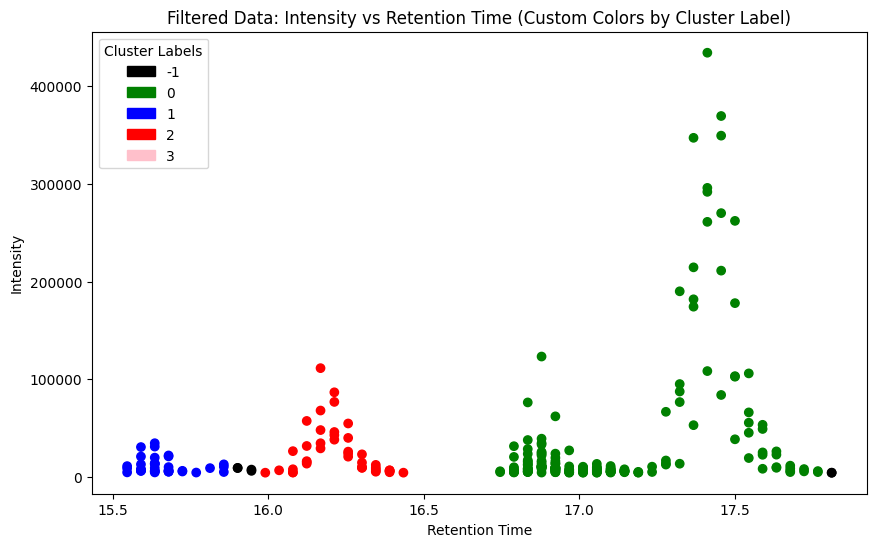

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define custom colors for the clusters
color_map = {-1: 'black', 0: 'green', 1: 'blue', 2: 'red',3:'pink'}
colors = clustered_data['Cluster_Label'].map(color_map)

# Plotting the Intensity vs Retention Time with custom colors
plt.figure(figsize=(10, 6))
plt.scatter(clustered_data['Retention_Time'], clustered_data['OzESI_Intensity'], c=colors)

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('Intensity')
plt.title('Filtered Data: Intensity vs Retention Time (Custom Colors by Cluster Label)')

# Creating a legend for the plot
legend_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', -1: 'Cluster -1'}
patch_list = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
plt.legend(handles=patch_list, loc='upper left', title='Cluster Labels')

# Displaying the plot
plt.show()

Group data

In [72]:
#group cluster data by sample ID Parent and Product Ion
# grouped_cluster_data = clustered_data.groupby(['Sample_ID', 'Parent_Ion', 'Product_Ion'])
grouped_cluster_data = clustered_data.groupby(['Parent_Ion', 'Product_Ion'])
#add group number to each to a new column called Group
clustered_data['Group'] = grouped_cluster_data.ngroup()
clustered_data

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group
75821,904.8,605.5,16.879217,10233.460938,11282023_DOD94_F3_WT_cereb_O3on_01,904.8 -> 605.5,0,0
75822,904.8,605.5,16.923617,9459.000977,11282023_DOD94_F3_WT_cereb_O3on_01,904.8 -> 605.5,0,0
159909,904.8,605.5,16.834817,5489.240234,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0
159910,904.8,605.5,16.879217,11255.260742,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0
159911,904.8,605.5,16.923633,9929.000977,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0
...,...,...,...,...,...,...,...,...
4128999,904.8,605.5,17.500917,102644.789062,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0,0
4129000,904.8,605.5,17.545333,55573.125000,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0,0
4129001,904.8,605.5,17.589733,25157.662109,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0,0
4129002,904.8,605.5,17.634150,10066.060547,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0,0


Verify correct cluster

Find mean RT and max Intensity

In [62]:
# import pandas as pd

# # Assuming df is your original DataFrame
# grouped = clustered_data.groupby(['Group', 'Cluster_Label'])
# grouped2 = clustered_data.groupby(['Parent_Ion', 'Product_Ion'])

# # Calculating the average Retention_Time and maximum OzESI_Intensity
# aggregated_df = grouped.agg({
#     'Retention_Time': 'mean',
#     'OzESI_Intensity': 'max'
# }).reset_index()

# # Renaming the columns for clarity
# aggregated_df.rename(columns={
#     'Retention_Time': 'Average_Retention_Time',
#     'OzESI_Intensity': 'Max_OzESI_Intensity'
# }, inplace=True)

# # Merging with the original DataFrame to keep all columns
# # Using 'left' merge to keep all rows from the original DataFrame
# # and only add the aggregated values
# final_df = pd.merge(clustered_data.drop(columns=['Retention_Time', 'OzESI_Intensity']),
#                     aggregated_df, on=['Group', 'Cluster_Label'], how='left')

# # Now, final_df contains all original columns plus the new aggregated columns
# # Assuming final_df is your DataFrame from the previous step

# # Group by 'Group' and 'Cluster_Label' and keep the row with the maximum 'OzESI_Intensity'
# max_intensity_df = final_df.loc[final_df.groupby(['Group', 'Cluster_Label'])['Max_OzESI_Intensity'].idxmax()]

# # Now, max_intensity_df contains only the rows with the maximum 'OzESI_Intensity' for each Group and Cluster_Label pair
# # Filtering out rows where 'Cluster_Label' is -1
# filtered_df = max_intensity_df[max_intensity_df['Cluster_Label'] != -1]

mean RT max intensity

In [246]:
# import pandas as pd

# # Assuming clustered_data is your original DataFrame

# # Group by 'Group' and 'Cluster_Label' for OzESI_Intensity and calculate mean
# grouped = clustered_data.groupby(['Group', 'Cluster_Label'])
# mean_intensity_df = grouped['OzESI_Intensity'].mean().reset_index()
# mean_intensity_df.rename(columns={'OzESI_Intensity': 'Mean_OzESI_Intensity'}, inplace=True)

# # Merge the mean intensity values back into the original DataFrame
# merged_df = pd.merge(clustered_data, mean_intensity_df, on=['Group', 'Cluster_Label'], how='left')

# # Group by 'Parent_Ion' and 'Product_Ion' for Retention_Time and calculate average
# grouped2 = clustered_data.groupby(['Parent_Ion', 'Product_Ion'])
# average_retention_time_df = grouped2['Retention_Time'].mean().reset_index()
# average_retention_time_df.rename(columns={'Retention_Time': 'Average_Retention_Time'}, inplace=True)

# # Merge the average retention time values back into the merged DataFrame
# merged_df = pd.merge(merged_df, average_retention_time_df, on=['Parent_Ion', 'Product_Ion'], how='left')

# # Filtering out rows where 'Cluster_Label' is -1
# filtered_df = merged_df[merged_df['Cluster_Label'] != -1]

# filtered_df


Max Intensity Mean RT

In [61]:
import pandas as pd

# Assuming clustered_data is your original DataFrame

# Calculate the max OzESI_Intensity for each Group and Cluster_Label
# directly within the DataFrame
clustered_data['Max_OzESI_Intensity'] = clustered_data.groupby(['Group', 'Cluster_Label'])['OzESI_Intensity'].transform('max')

# Calculate the average Retention_Time for each Parent_Ion and Product_Ion
# directly within the DataFrame
clustered_data['Average_Retention_Time'] = clustered_data.groupby(['Parent_Ion', 'Product_Ion', 'Cluster_Label'])['Retention_Time'].transform('mean')

# Filtering out rows where 'Cluster_Label' is -1
filtered_df = clustered_data[clustered_data['Cluster_Label'] != -1]

filtered_df


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Max_OzESI_Intensity,Average_Retention_Time
75821,904.8,605.5,16.879217,10233.460938,11282023_DOD94_F3_WT_cereb_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
75822,904.8,605.5,16.923617,9459.000977,11282023_DOD94_F3_WT_cereb_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
159909,904.8,605.5,16.834817,5489.240234,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
159910,904.8,605.5,16.879217,11255.260742,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
159911,904.8,605.5,16.923633,9929.000977,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
...,...,...,...,...,...,...,...,...,...,...
4128999,904.8,605.5,17.500917,102644.789062,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
4129000,904.8,605.5,17.545333,55573.125000,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
4129001,904.8,605.5,17.589733,25157.662109,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
4129002,904.8,605.5,17.634150,10066.060547,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686


Choose Cluster with correct RT

In [62]:
# import pandas as pd

# # Assuming filtered_df is your DataFrame

# # Step 1: Identify the combination with the highest Max_OzESI_Intensity for each Group
# group_max_intensity_combination = filtered_df.groupby('Group').apply(lambda x: x.loc[x['Max_OzESI_Intensity'].idxmax()])

# # Step 2: Create a mapping from Group to Average_Retention_Time of the identified combination
# group_to_correct_rt = group_max_intensity_combination.set_index('Group')['Average_Retention_Time'].to_dict()

# # Step 3: Map the Correct_RT values to the original DataFrame
# filtered_df['Correct_RT'] = filtered_df['Group'].map(group_to_correct_rt)

# filtered_df
import pandas as pd

# Assuming filtered_df is your DataFrame

# Step 1: Identify the combination with the highest Max_OzESI_Intensity for each Group
group_max_intensity_combination = filtered_df.groupby('Group').apply(lambda x: x.loc[x['Max_OzESI_Intensity'].idxmax()])

# Identify which Cluster_Label this belongs to
group_to_cluster = group_max_intensity_combination.set_index('Group')['Cluster_Label'].to_dict()

# Step 2: Drop other Cluster_Labels from the df for that specific group
filtered_df = filtered_df[filtered_df.apply(lambda x: x['Cluster_Label'] == group_to_cluster[x['Group']], axis=1)]

filtered_df


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Max_OzESI_Intensity,Average_Retention_Time
75821,904.8,605.5,16.879217,10233.460938,11282023_DOD94_F3_WT_cereb_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
75822,904.8,605.5,16.923617,9459.000977,11282023_DOD94_F3_WT_cereb_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
159909,904.8,605.5,16.834817,5489.240234,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
159910,904.8,605.5,16.879217,11255.260742,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
159911,904.8,605.5,16.923633,9929.000977,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
...,...,...,...,...,...,...,...,...,...,...
4128999,904.8,605.5,17.500917,102644.789062,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
4129000,904.8,605.5,17.545333,55573.125000,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
4129001,904.8,605.5,17.589733,25157.662109,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
4129002,904.8,605.5,17.634150,10066.060547,12012023_FAD173_M1_5xFAD_liver_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686


Filter max intensity for each 'Sample_ID', 'Group'

In [63]:
import pandas as pd

# Assuming your DataFrame is named df

# Group by 'Sample_ID' and 'Group', and find the row with the highest 'OzESI_Intensity' for each group
filtered_df2= filtered_df.groupby(['Sample_ID', 'Group']).apply(lambda x: x.loc[x['OzESI_Intensity'].idxmax()]).reset_index(drop=True)

filtered_df2


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Max_OzESI_Intensity,Average_Retention_Time
0,904.8,605.5,16.879217,10233.460938,11282023_DOD94_F3_WT_cereb_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
1,904.8,605.5,16.879217,11255.260742,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
2,904.8,605.5,16.968050,27216.562500,11282023_DOD94_F3_WT_dienc_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
3,904.8,605.5,17.012450,8058.380371,11282023_DOD94_F3_WT_hippo_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
4,904.8,605.5,16.879233,16484.201172,11282023_FAD184_F3_WT_cereb_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
5,904.8,605.5,16.879233,25699.222656,11282023_FAD184_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
6,904.8,605.5,16.879217,9882.780273,11282023_FAD184_F3_WT_dienc_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
7,904.8,605.5,16.834817,15235.420898,11282023_FAD184_F3_WT_hippo_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
8,904.8,605.5,16.879217,10379.340820,11282023_FAD184_F4_WT_cereb_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686
9,904.8,605.5,16.879217,10948.541016,11282023_FAD184_F4_WT_dienc_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686


In [64]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# # Define custom colors for the clusters
# color_map = {-1: 'black', 0: 'green', 1: 'blue', 2: 'red',3:'pink'}
# colors = clustered_data['Cluster_Label'].map(color_map)

# # Plotting the Intensity vs Retention Time with custom colors
# plt.figure(figsize=(10, 6))
# plt.scatter(clustered_data['Retention_Time'], clustered_data['OzESI_Intensity'], c=colors)

# # Adding labels and title to the plot
# plt.xlabel('Retention Time')
# plt.ylabel('Intensity')
# plt.title('Filtered Data: Intensity vs Retention Time (Custom Colors by Cluster Label)')

# # Creating a legend for the plot
# legend_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', -1: 'Cluster -1'}
# patch_list = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
# plt.legend(handles=patch_list, loc='upper left', title='Cluster Labels')

# # Displaying the plot
# plt.show()

match lipids to this df

In [65]:
mrm_database = CLAW.read_mrm_list(data_base_name_location, deuterated=False)
matched_df = CLAW.match_lipids_parser(mrm_database, filtered_df2, tolerance=0.3)
matched_df

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Max_OzESI_Intensity,Average_Retention_Time,Lipid,Class
0,904.8,605.5,16.879217,10233.460938,11282023_DOD94_F3_WT_cereb_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686,"[TG(55:9),TG(54:2)]_FA18:1",TAG
1,904.8,605.5,16.879217,11255.260742,11282023_DOD94_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686,"[TG(55:9),TG(54:2)]_FA18:1",TAG
2,904.8,605.5,16.968050,27216.562500,11282023_DOD94_F3_WT_dienc_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686,"[TG(55:9),TG(54:2)]_FA18:1",TAG
3,904.8,605.5,17.012450,8058.380371,11282023_DOD94_F3_WT_hippo_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686,"[TG(55:9),TG(54:2)]_FA18:1",TAG
4,904.8,605.5,16.879233,16484.201172,11282023_FAD184_F3_WT_cereb_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686,"[TG(55:9),TG(54:2)]_FA18:1",TAG
5,904.8,605.5,16.879233,25699.222656,11282023_FAD184_F3_WT_cortex_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686,"[TG(55:9),TG(54:2)]_FA18:1",TAG
6,904.8,605.5,16.879217,9882.780273,11282023_FAD184_F3_WT_dienc_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686,"[TG(55:9),TG(54:2)]_FA18:1",TAG
7,904.8,605.5,16.834817,15235.420898,11282023_FAD184_F3_WT_hippo_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686,"[TG(55:9),TG(54:2)]_FA18:1",TAG
8,904.8,605.5,16.879217,10379.340820,11282023_FAD184_F4_WT_cereb_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686,"[TG(55:9),TG(54:2)]_FA18:1",TAG
9,904.8,605.5,16.879217,10948.541016,11282023_FAD184_F4_WT_dienc_O3on_01,904.8 -> 605.5,0,0,434292.0,17.102686,"[TG(55:9),TG(54:2)]_FA18:1",TAG


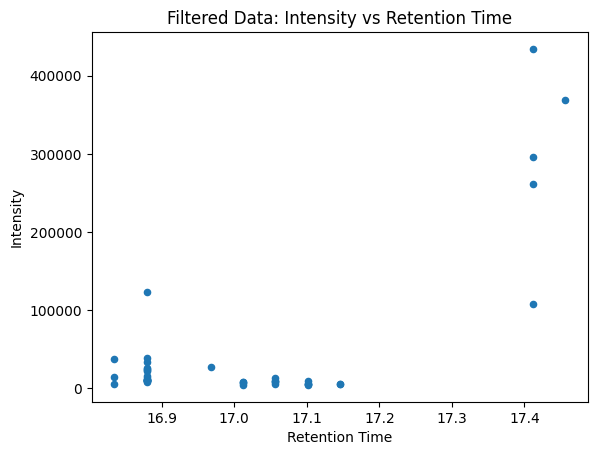

In [66]:
import matplotlib.pyplot as plt

# Plotting the Intensity vs Retention Time
matched_df.plot(x='Retention_Time', y='OzESI_Intensity', kind='scatter')

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('Intensity')
plt.title('Filtered Data: Intensity vs Retention Time')

# Displaying the plot
plt.show()


OzESI Matching Part

In [262]:
# MRM_RT_df = matched_df